### Student Information
Name: 紀維鑫 Kevin Karnadi Kirmansjah

Student ID: 109006241

GitHub ID: [KevinKarnadi](https://github.com/KevinKarnadi)

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## Table of Contents

- Part I (20%): Exercises from DM2023-Lab1-Master
- Part II (30%): Follow process from DM2023-Lab1-Master on the new dataset
  - Data Preparation & Transformation
  - Data Mining
    - Handle Missing Values
    - Delete Duplicate Data
  - Data Preprocessing
    - Sampling
    - Feature Creation
    - Feature Subset Selection
    - Dimensionality Reduction
    - Attribute Transformation / Aggregation
  - Data Exploration
- Part III (30%): New tasks on the new dataset
  - New Data Visualizations
  - Generate TF-IDF Features
  - Classification with Naive Bayes Classifier
- Part IV (10%): Inefficient parts from the lab? How to improve?

## Libraries & Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
import seaborn as sns
import plotly.express as px
import math

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

from wordcloud import WordCloud
from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
import sys
import os

path = os.path.abspath(os.path.join(os.path.dirname('DM2023-Lab1-Homework.ipynb'), '../helpers'))
sys.path.append(path)

import data_mining_helpers as dmh

sys.path.remove(path)

## Part I

Exercises from DM2023-Lab1-Master

In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
# Return records with 'alt.atheism' category
X[X['category_name'] == 'alt.atheism']

text  category  \
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
17    Organization: Penn State University From: <JSN...         0   
19    Subject: Re: Don't more innocents die without ...         0   
21    From: gmiller@worldbank.org (Gene C. Miller) S...         0   
...                                                 ...       ...   
2231  Subject: Re: Feminism and Islam, again From: k...         0   
2233  From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...         0   
2234  From: David.Rice@ofa123.fidonet.org Subject: i...         0   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   

     category_name  
12     alt.atheism  
13     alt.atheism  
17     alt.atheism  
19     alt.atheism  
21     alt.atheism  
...            ...  
2231   alt.atheism  
2233   alt.atheism  
2234   alt.atheism  
2237   alt.atheism  
2250   alt.atheism  

[480 rows x 3 columns]

In [6]:
# Return records with 'soc.religion.christian' category
X[X['category_name'] == 'soc.religion.christian']

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2229  soc.religion.christian  
2230  soc.religion.christian  
2246  soc.religion.christian  
2247  soc.religion.christian  
2249  soc.religion.christian  

[599 rows x 3 columns]

In [7]:
# Return records with 'comp.graphics' category
X[X['category_name'] == 'comp.graphics']

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

In [8]:
# Return records with 'sci.med' category
X[X['category_name'] == 'sci.med']

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [9]:
# Random sampling of 5 records (without replacement)
X.sample(5)

text  category  \
71    From: Daniel.Prince@f129.n102.z1.calcom.socal....         2   
1223  From: bbs.mirage@tsoft.net (Jerry Lee) Subject...         1   
615   From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
1633  From: HOLFELTZ@LSTC2VM.stortek.com Subject: Re...         3   
2116  From: dufault@lftfld.enet.dec.com (MD) Subject...         2   

               category_name  
71                   sci.med  
1223           comp.graphics  
615              alt.atheism  
1633  soc.religion.christian  
2116                 sci.med

Exercise 2 done.

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Ans:**

Because on IDs C, D, F, there is actually a value on their 'missing_example' columns, but they are in the form of a string, disguised to be a NaN value, which are specifically 'NaN', 'None', and ''. They may seem like a NaN value, but are actually not.

Exercise 5 done.

In [11]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**Ans:**

The X_sample dataframe is a sample from the original X dataframe that can help us in understanding the original X dataframe. It has a smaller number of samples (rows), which is 1000, as opposed to the original 2257. This is because the new X_sample dataframe is sampled from the original X dataframe. Because the new dataframe is randomly sampled, it may also have a different distribution of categories compared to the original dataframe.

Exercise 6 done.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

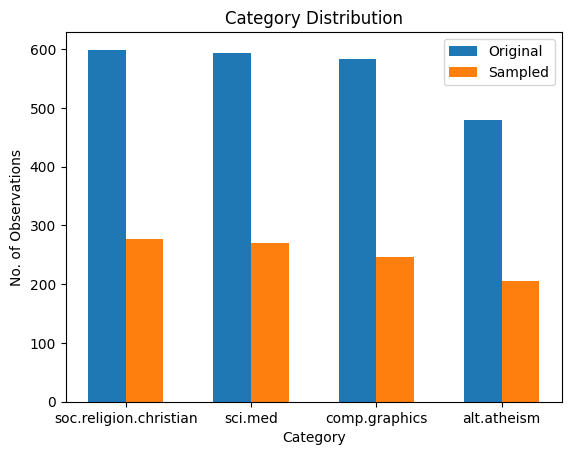

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

width = 0.3
x = np.arange(len(categories))

plt.bar(x - width/2, X.category_name.value_counts().values, width, label='Original')
plt.bar(x + width/2, X_sample.category_name.value_counts().values, width, label='Sampled')
plt.xticks(x, X.category_name.value_counts().index)

plt.xlabel('Category') 
plt.ylabel('No. of Observations') 
plt.title('Category Distribution')
plt.legend()

plt.show()

Exercise 8 done.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

print(count_vect.get_feature_names_out()[0:1])
X_counts[0:5, 0:100].toarray()

['00']


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
location = np.where(X_counts[4, 0:100].toarray()[0] == 1)[0]
print("Location of 1s:", location) # Check on which indices the 1s are located
print("What the second 1 represents:", count_vect.get_feature_names_out()[location[1]])

Location of 1s: [ 0 37]
What the second 1 represents: 01


Exercise 10 done.

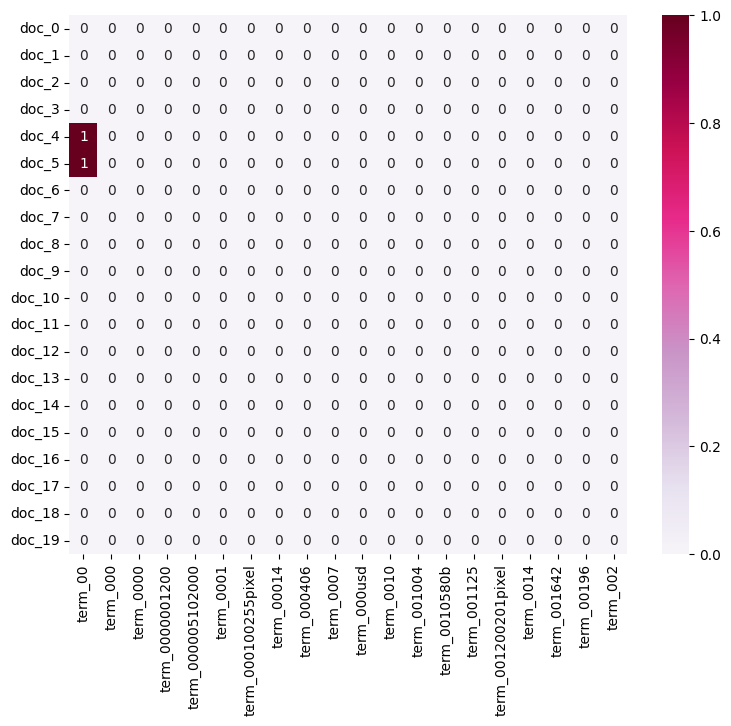

In [15]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

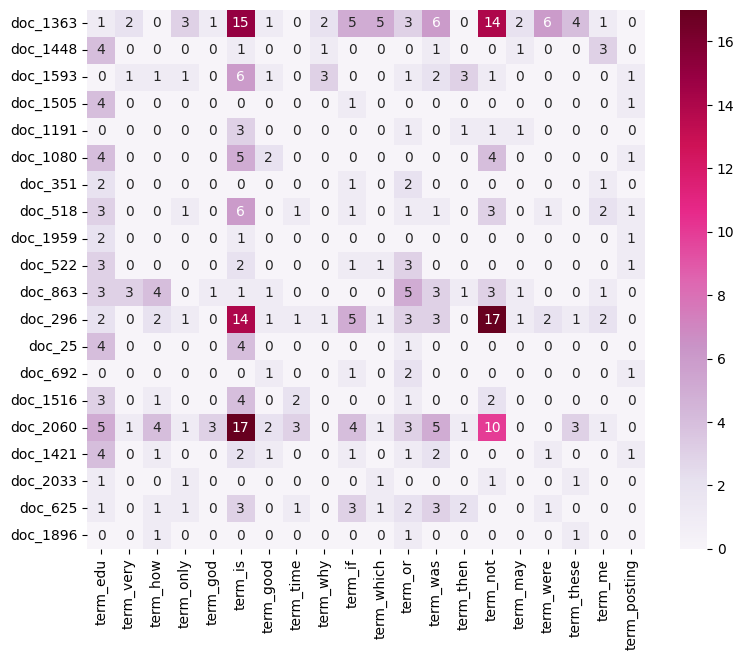

In [16]:
# We can do this more efficiently by plotting the term-document matrix between 20 terms that are randomly sampled from 100 most frequent terms
# across the whole document in 20 randomly sampled documents

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
sorted_idx = sorted(range(len(term_frequencies)), key=lambda i: term_frequencies[i], reverse=True)[:100]
x_idx = np.random.choice(sorted_idx, size=20, replace=False)
y_idx = np.random.choice(X_counts.shape[0], size=20, replace=False)

plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in x_idx]
plot_y = ["doc_"+ str(X.index[i]) for i in y_idx]
plot_z = X_counts[y_idx, :][:, x_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True)

Exercise 11 done.

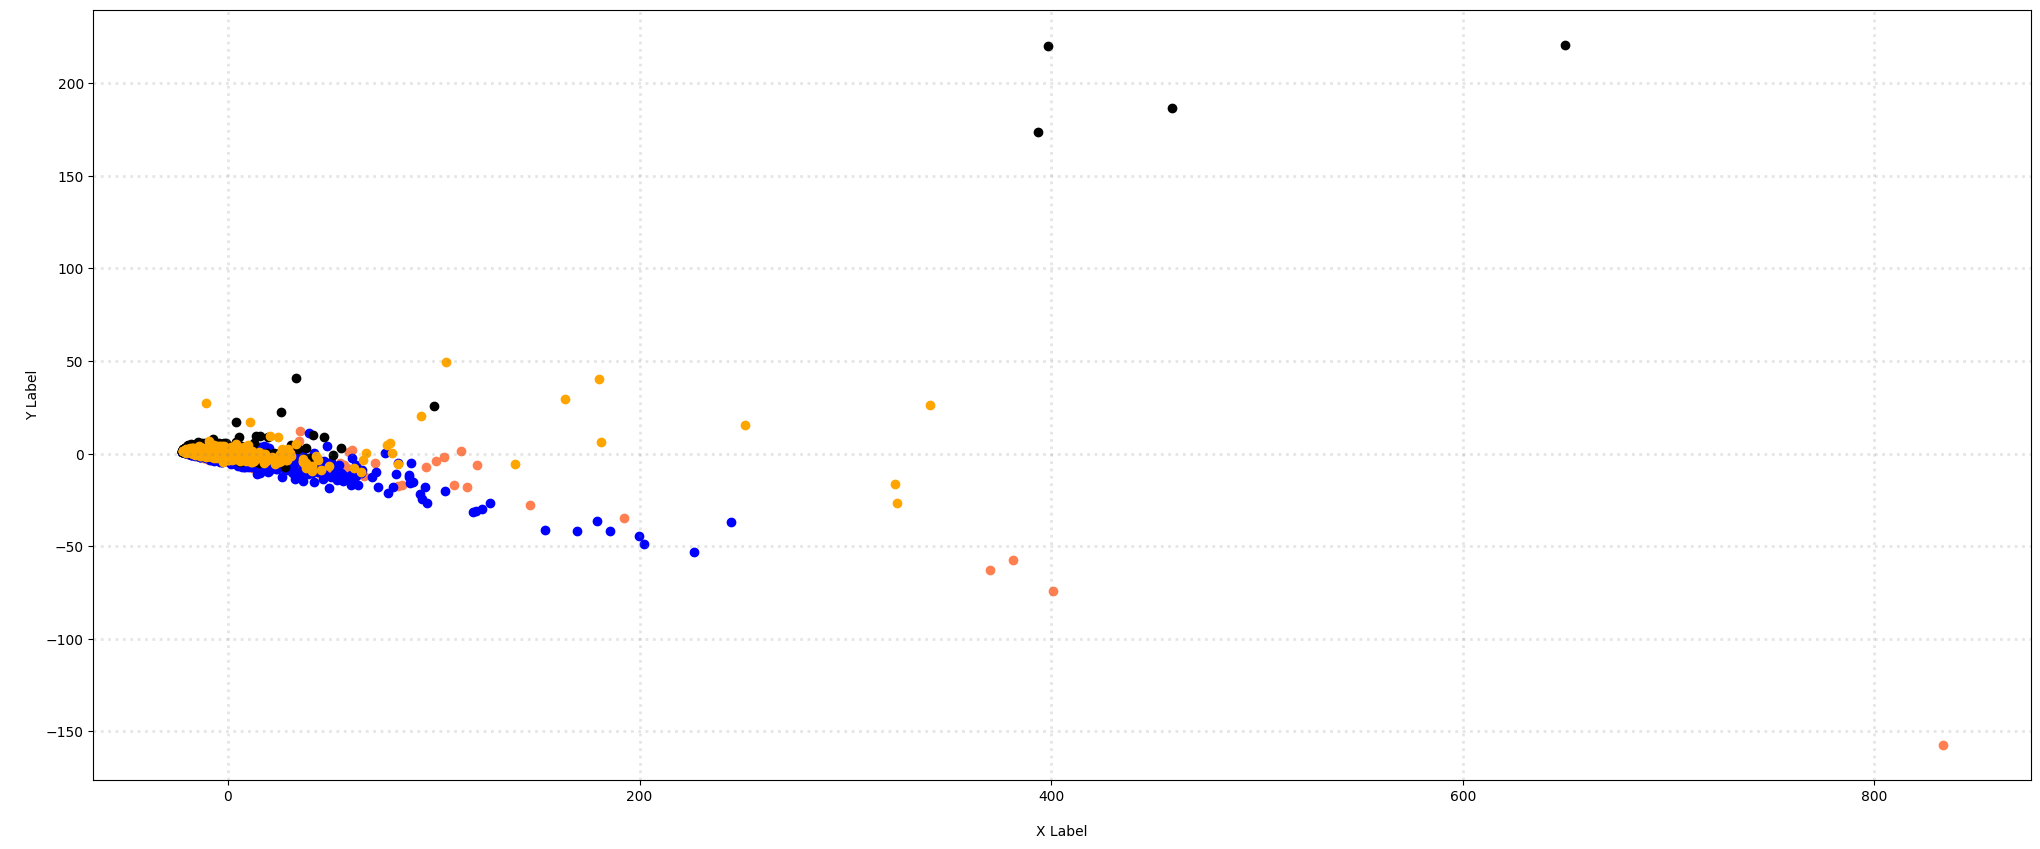

In [17]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [18]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

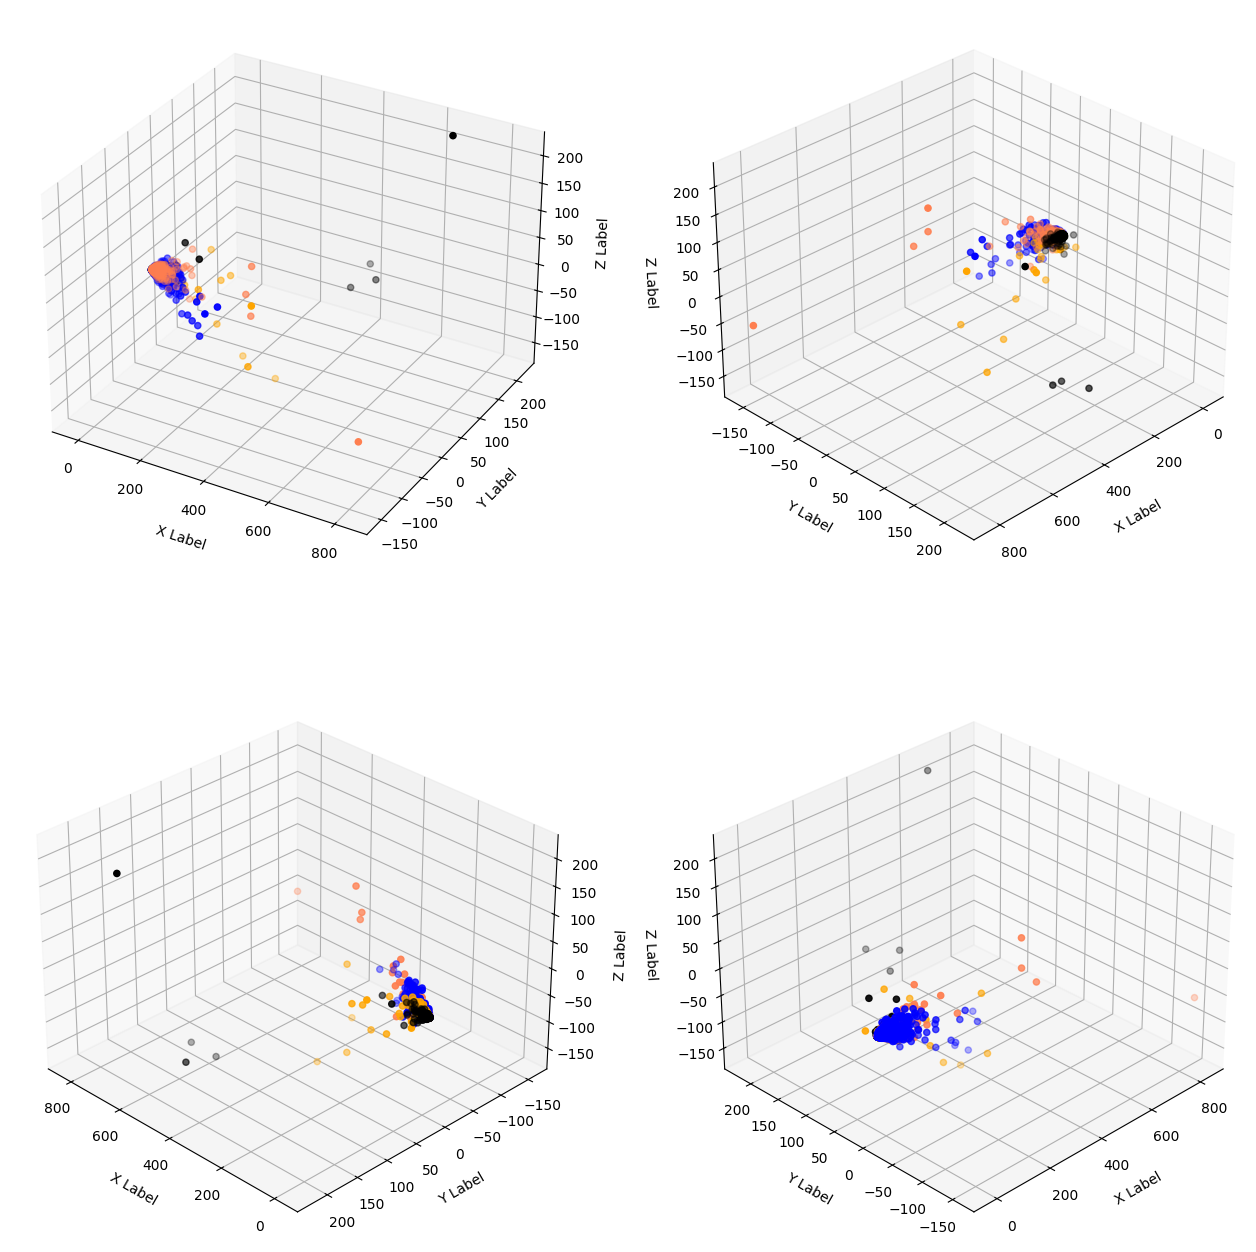

In [19]:
col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (16, 16))

# Plot 1
ax = fig.add_subplot(2,2,1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')


# Plot 2
ax = fig.add_subplot(2,2,2, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')

ax.view_init(azim=45)


# Plot 3
ax = fig.add_subplot(2,2,3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')

ax.view_init(azim=135)


# Plot 4
ax = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')

ax.view_init(azim=225)


plt.show()

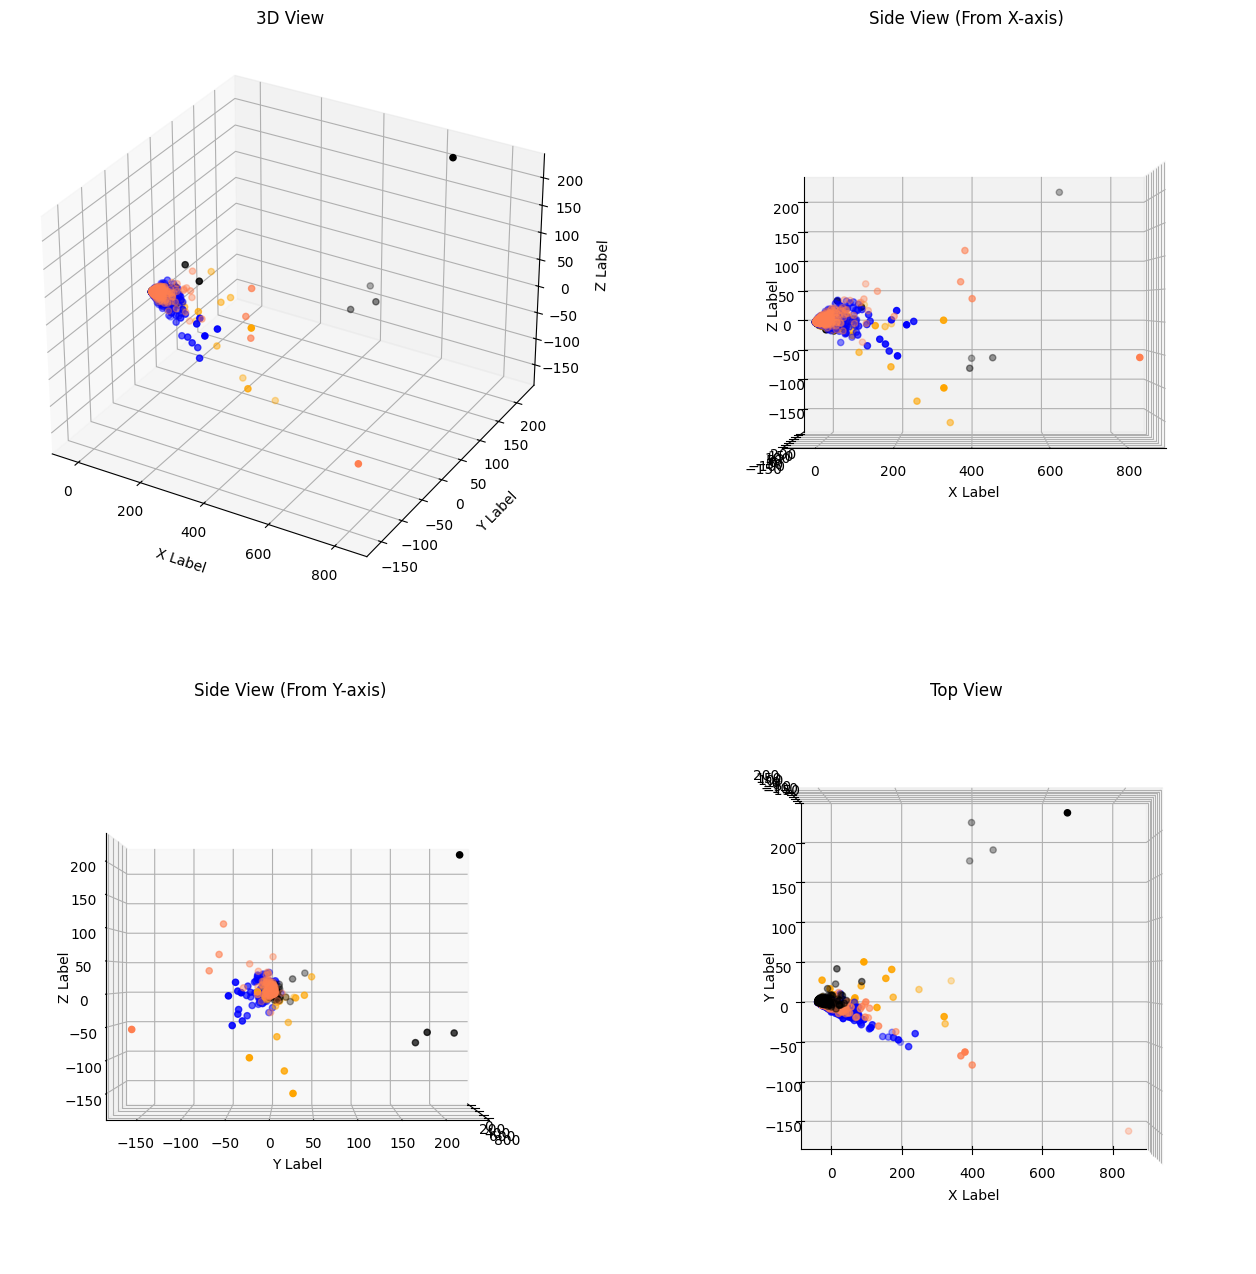

In [20]:
col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (16, 16))

# Plot 1
ax = fig.add_subplot(2,2,1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('3D View'); ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')


# Plot 2
ax = fig.add_subplot(2,2,2, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From X-axis)'); ax.set_xlabel('\nX Label'); ax.set_zlabel('\nZ Label')

ax.view_init(0,-90,0)


# Plot 3
ax = fig.add_subplot(2,2,3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From Y-axis)'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')

ax.view_init(0,0,0)


# Plot 4
ax = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Top View'); ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label')

ax.view_init(90,-90,0)


plt.show()

**Ans:**

From the plots above, we can see that the X label, which indicates PC1 (the 1st principal component), explains the most variance in the data, followed by the Y label (PC2), and Z label (PC3). Moreover, we can also see that the data points with different categories are not clustered and separated clearly from data points with other categories, whereas the data points from the same category should be properly clustered together. This means that the PCA may not be providing us with an important information.

When we compare the plots of PCA using 2 components and 3 components, we can see that there is no significant information changes that is brought by increasing the number of components from 2 to 3, so I think using PCA with 2 components is already enough in this case.

Exercise 12 done.

In [21]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

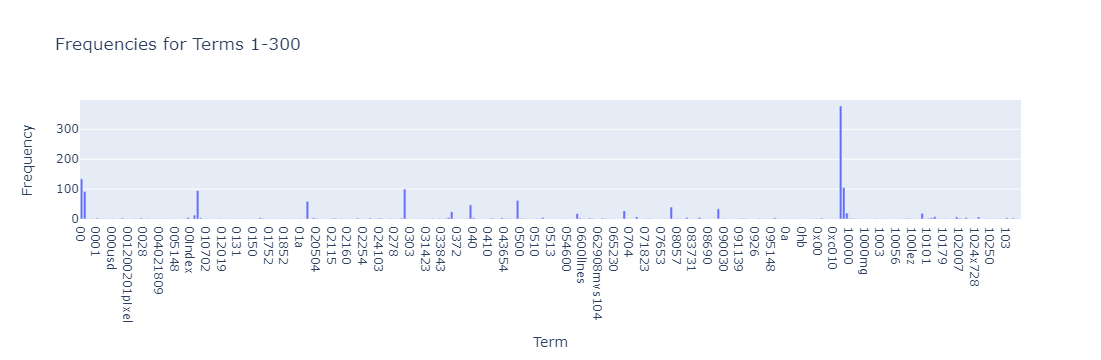

In [22]:
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Frequencies for Terms 1-300')
fig.show()

Exercise 13 done.

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


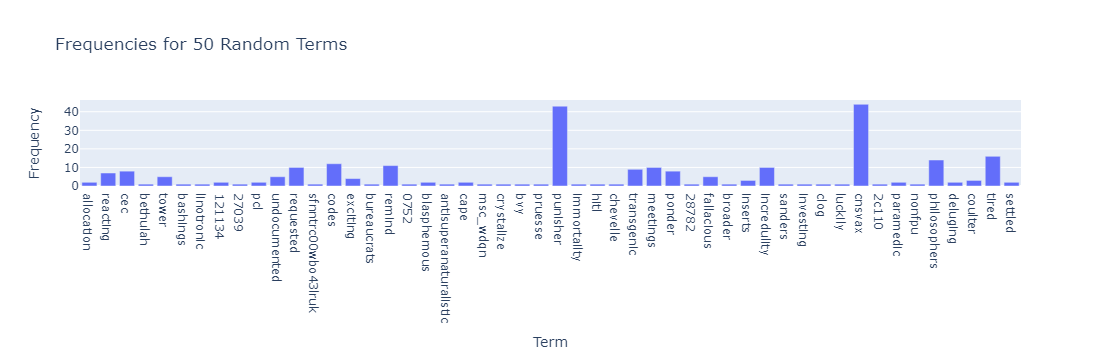

In [23]:
idx = np.random.choice(X_counts.shape[1], size=50, replace=False)
x = [count_vect.get_feature_names_out()[i] for i in idx]
y = [term_frequencies[i] for i in idx]

fig = px.bar(x=x, y=y,
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Frequencies for 50 Random Terms')
fig.show()

Exercise 14 done.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

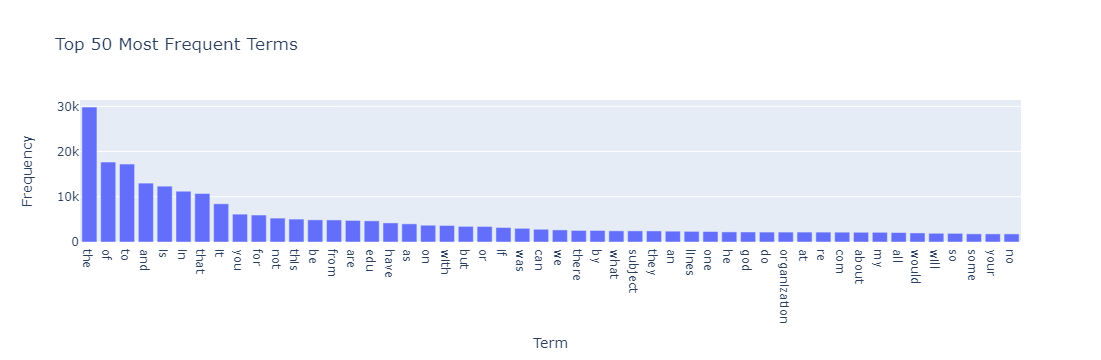

In [24]:
names = count_vect.get_feature_names_out()
freq = term_frequencies

combined = list(zip(names, freq))
sorted_data = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_data)

fig = px.bar(x=names[:50], y=freq[:50],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Top 50 Most Frequent Terms')
fig.show()

Exercise 15 done.

In [25]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [26]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

**Ans:**

Yes, it also works. The idea here is the same, where the 'category_name' variable, which contains 4 different values, is used to create the new variable, 'bin_category_name', which is just the one hot encoded version of the 'category_name' variable.

Exercise 16 done.

## Part II

Follow process from DM2023-Lab1-Master on the new dataset

### 1. Data Preparation & Transformation

First, let's load each of the txt files as a Pandas dataframe, by using pd.read_csv()

According to the dataset specs, the dataset from each website has 500 positive (score 1) and 500 negative (score 0) sentences, selected randomly for larger datasets of reviews. The format of the data is "(sentence) \t (score) \n".

#### Load Data

In [27]:
data1 = pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'score'], sep='\t')
print(data1.shape)
data1[:5]

(1000, 2)


sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1

In [28]:
data2 = pd.read_csv('imdb_labelled.txt', names=['sentence', 'score'], sep='\t')
print(data2.shape)
data2[:5]

(748, 2)


sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

For the IMDB dataset, notice only 748 observations are successfully read from the txt file, whereas it should be 1000. It means that there is something wrong with our code.

After observing the raw txt file, it seems that the problem is in the separator. Some of the separators have whitespaces in front of the \t. Let's try changing our separator and try to load the data again.

In [29]:
data2 = pd.read_csv('imdb_labelled.txt', names=['sentence', 'score'], sep='\s\t')
print(data2.shape)
data2[:5]

(1000, 2)


C:\Users\User\AppData\Local\Temp\ipykernel_16616\1171441699.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3        Very little music or anything to speak of.       0
4  The best scene in the movie was when Gerardo i...      1

In [30]:
data3 = pd.read_csv('yelp_labelled.txt', names=['sentence', 'score'], sep='\t')
print(data3.shape)
data3[:5]

(1000, 2)


sentence  score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [31]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

sentence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]

#### Observe Data

**Exercise 1**

Print out the 3 first text data

In [32]:
for i in data.sentence[:3]:
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [33]:
for i in data.score[:3]:
    print(i)

0
1
1


In [34]:
data.score.value_counts()

score
0    1500
1    1500
Name: count, dtype: int64

**Exercise 2**

Experimenting with other querying techniques

In [35]:
# Return records with score 0
data[data['score'] == 0].head()

sentence  score
0  So there is no way for me to plug it in here i...      0
3  Tied to charger for conversations lasting more...      0
5  I have to jiggle the plug to get it to line up...      0
6  If you have several dozen or several hundred c...      0
8                Needless to say, I wasted my money.      0

In [36]:
# Return records with score 1
data[data['score'] == 1].head()

sentence  score
1                   Good case, Excellent value.      1
2                        Great for the jawbone.      1
4                             The mic is great.      1
7   If you are Razr owner...you must have this!      1
10              And the sound quality is great.      1

**Exercise 3**

Fetch records with score 0, and query every 10th record. Only show the first 5 records.

In [37]:
data[data['score'] == 0].iloc[::10][:5]

sentence  score
0   So there is no way for me to plug it in here i...      0
20  I went on Motorola's website and followed all ...      0
37                        Poor Talk Time Performance.      0
60  Essentially you can forget Microsoft's tech su...      0
83                     The battery runs down quickly.      0

### 2. Data Mining

#### Missing Values

In [38]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

**Exercise 4**

Compute missing values in every row instead of column

In [39]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

**Exercise 5**

This exercise is only implemented to test our understanding of null value detection, using a dummy data, so the code and answer here will still be the same as before.

In [40]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Ans:** Because on IDs C, D, F, there is actually a value on their 'missing_example' columns, but they are in the form of a string, disguised to be a NaN value, which are specifically 'NaN', 'None', and ''. They may seem like a NaN value, but are actually not.

#### Duplicate Data

In [41]:
sum(data.duplicated())

17

In [42]:
data[data.duplicated() == True]

sentence  score
285                                       Great phone!.      1
407                                        Works great.      1
524                                       Works great!.      1
543                             Don't buy this product.      0
744   If you like a loud buzzing to override all you...      0
748                                       Does not fit.      0
778                               This is a great deal.      1
792                                        Great Phone.      1
892                    Excellent product for the price.      1
896                                        Great phone.      1
1363                    Definitely worth checking out.       1
1585                                  Not recommended.       0
1788                                             10/10       1
2814                                 I love this place.      1
2816                             The food was terrible.      0
2843                                   I won't be back.      0
2846                  I would not recommend this place.      0

It seems that there are duplicate data in our dataframe. Let's take care of this by dropping those duplicate data using drop_duplicates()

In [43]:
data.drop_duplicates(inplace=True)
sum(data.duplicated())

0

In [44]:
len(data)

2983

### 3. Data Preprocessing

#### 3.1 Sampling

In [45]:
data_sample = data.sample(n=1000)
data_sample

sentence  score
1399  The good cinematography also makes her and Mon...      1
2480  We asked for the bill to leave without eating ...      0
1723           It's an empty, hollow shell of a movie.       0
132   Headset works great & was packaged nicely to a...      1
2856       Went in for happy hour, great list of wines.      1
...                                                 ...    ...
1710   The stories were as unbelievable as the actors.       0
2907  The chips and sals a here is amazing!!!!!!!!!!...      1
254   This product had a strong rubber/petroleum sme...      0
2202                         The warm beer didn't help.      0
2067  Update.....went back for a second time and it ...      1

[1000 rows x 2 columns]

**Exercise 6**

Differences from the original dataframe vs the sampled dataframe?

**Ans:** Again, the answer is still the same as before. The sampled dataframe is a sample from the original dataframe that can help us in understanding the original dataframe. It has a smaller number of samples (rows), which is 1000, as opposed to the original 3000. This is because the new sampled dataframe is sampled from the original dataframe. Because the new dataframe is randomly sampled, it may also have a different distribution of scores compared to the original dataframe.

**Exercise 7**

How to automatically determine upper bound without hardcoding it?

**Ans:** Yes, we can set an upper bound, by setting it as the maximum value between the heights + a small number.

<Axes: title={'center': 'Score Distribution for Original Data'}, xlabel='score'>

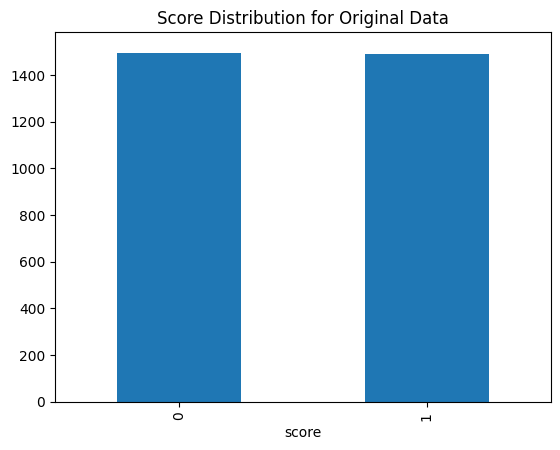

In [46]:
upper_bound = max(data.score.value_counts() + 90)
data.score.value_counts().plot(kind='bar',
                               title='Score Distribution for Original Data',
                               ylim=[0, upper_bound])

<Axes: title={'center': 'Score Distribution for Sample Data'}, xlabel='score'>

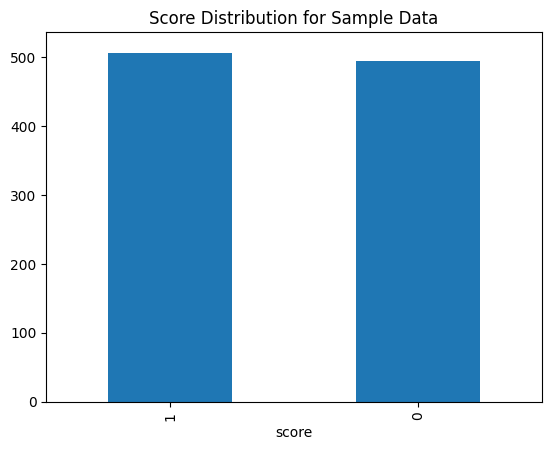

In [47]:
upper_bound = max(data_sample.score.value_counts() + 30)
data_sample.score.value_counts().plot(kind='bar',
                                      title='Score Distribution for Sample Data',
                                      ylim=[0, upper_bound])

**Exercise 8**

Side-by-side bar plot between the original vs sampled data

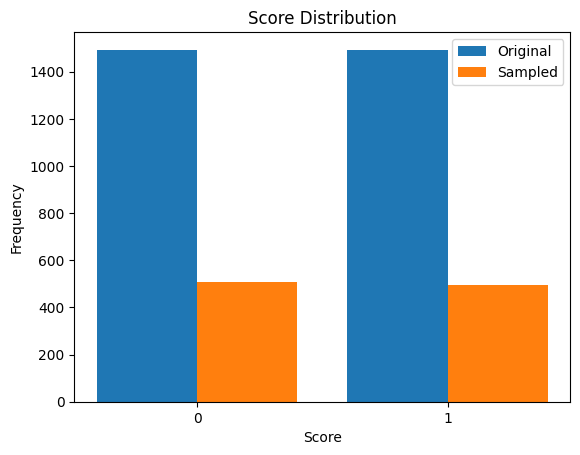

In [48]:
width = 0.4
x = np.arange(2)

plt.bar(x - width/2, data.score.value_counts().values, width, label='Original')
plt.bar(x + width/2, data_sample.score.value_counts().values, width, label='Sampled')
plt.xticks(x, data.score.value_counts().index)

plt.xlabel('Score') 
plt.ylabel('Frequency') 
plt.title('Score Distribution')
plt.legend()

plt.show()

#### 3.2 Feature Creation

In [49]:
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))
data[:5]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

#### 3.3 Feature Subset Selection

In [132]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)
print(data_counts.shape)
print(data_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [51]:
print(count_vect.get_feature_names_out()[4161])
print(count_vect.get_feature_names_out()[4545])
print(count_vect.get_feature_names_out()[2427])
print(count_vect.get_feature_names_out()[3043])

so
there
is
no


**Exercise 9**

Analyze the text of the first record from the dataset.

In [52]:
analyze = count_vect.build_analyzer()
analyze(data.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [53]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [54]:
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

**Exercise 10**

Check what word the 1 from the array above represents from the vocabulary.

In [55]:
locations = np.where(data_counts[3, 0:100].toarray()[0] == 1)[0]
print("Location of 1s:", locations) # Check on which indices the 1s are located
print("What word does the 1 represent:", count_vect.get_feature_names_out()[locations[0]])

Location of 1s: [45]
What word does the 1 represent: 45


In [56]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)
plot_z = data_counts[0:20, 0:20].toarray() #data_counts[how many documents, how many terms]
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0

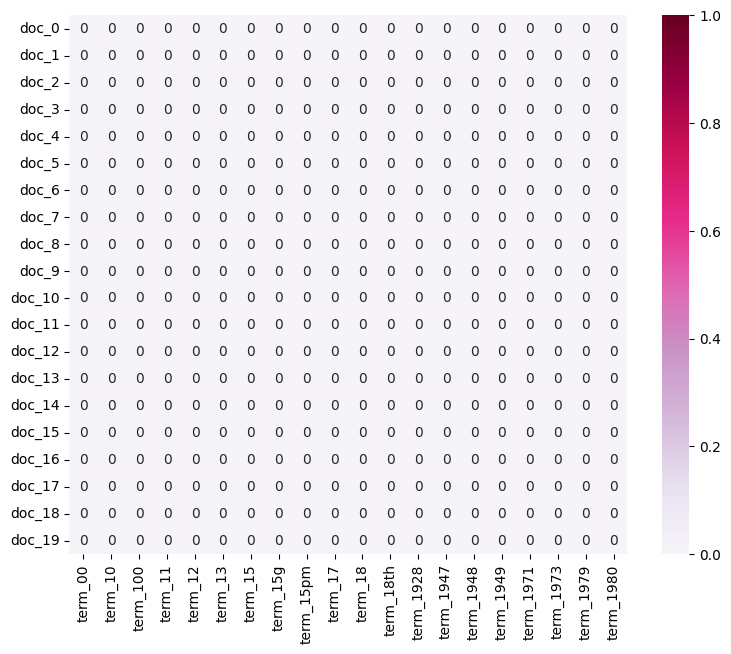

In [57]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**Exercise 11**

Plot a new term-document matrix.

**Ans:** We can do this more efficiently by plotting the term-document matrix between 20 terms that are randomly sampled from 50 most frequent terms across the whole document in 20 randomly sampled documents.

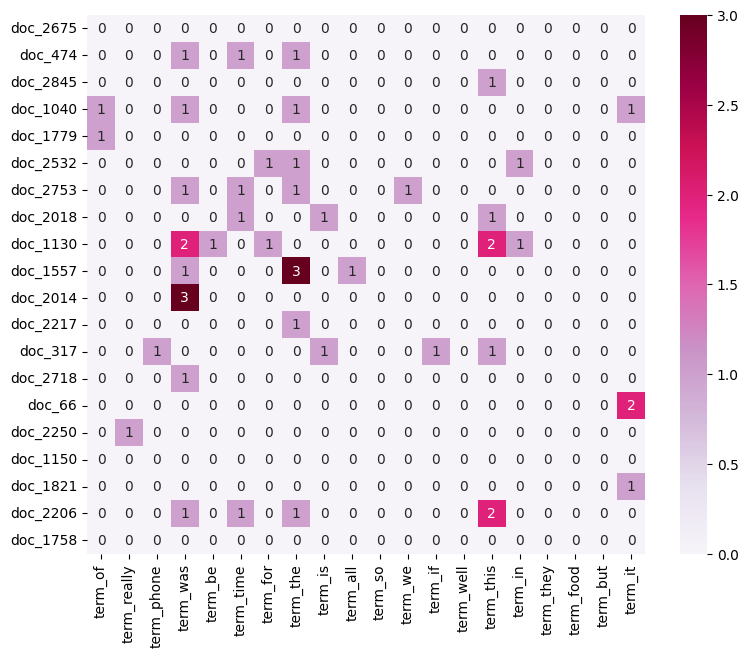

In [136]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
sorted_idx = sorted(range(len(term_frequencies)), key=lambda i: term_frequencies[i], reverse=True)[:50]
x_idx = np.random.choice(sorted_idx, size=20, replace=False)
y_idx = np.random.choice(data_counts.shape[0], size=20, replace=False)

plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in x_idx]
plot_y = ["doc_"+ str(data.index[i]) for i in y_idx]
plot_z = data_counts[y_idx, :][:, x_idx].toarray() #data_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True)

#### 3.4 Dimensionality Reduction

##### Find optimal n_components for PCA

We can use the help of a screeplot and the elbow method to find the optimal number of components for PCA.

In [59]:
pca = PCA(n_components=10).fit(data_counts.toarray())
sdev = np.sqrt(pca.explained_variance_)
eigenvalues = sdev**2 / sum(sdev**2)

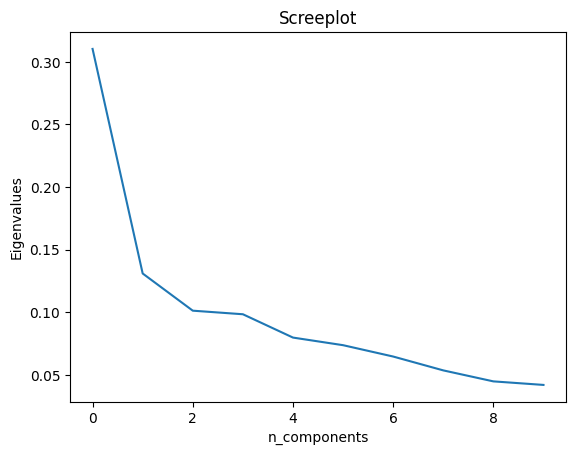

In [60]:
plt.plot(eigenvalues)
plt.title('Screeplot')
plt.xlabel('n_components')
plt.ylabel('Eigenvalues')
plt.show()

Using the elbow method on the screeplot result above, we can conclude that the optimal n_components is 1.

##### Perform PCA

In [61]:
print(data_counts.shape)
data_reduced = PCA(n_components=1).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2983, 5155)
(2983, 1)


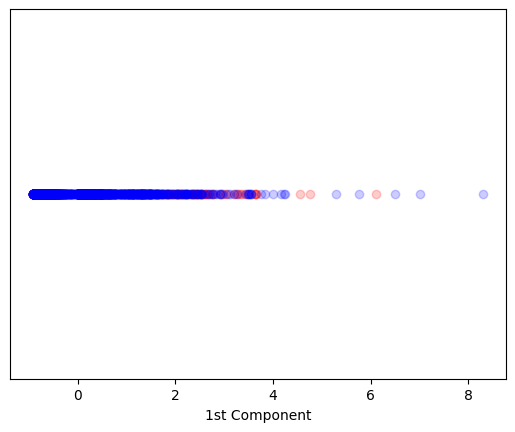

In [62]:
scores = [0, 1]
col = ['red', 'blue']

fig = plt.figure()
ax = fig.subplots()

for c, sc in zip(col, scores):
    xs = data_reduced[data['score'] == sc].T[0]
    
    ax.scatter(xs, [0]*len(xs), c=c, alpha=0.2)

ax.set_xlabel('1st Component')
ax.get_yaxis().set_visible(False)

plt.show()

Let's try using n_components = 2

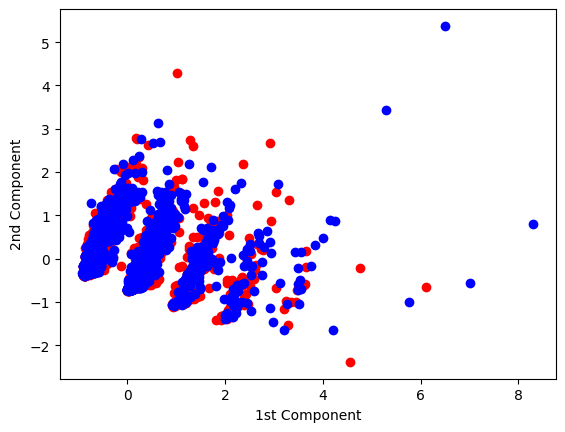

In [63]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

scores = [0, 1]
col = ['red', 'blue']

fig = plt.figure()
ax = fig.subplots()

for c, sc in zip(col, scores):
    xs = data_reduced[data['score'] == sc].T[0]
    ys = data_reduced[data['score'] == sc].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')

plt.show()

**Exercise 12**

Perform PCA with 3 components, plot the result, and describe the plot.

In [64]:
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())

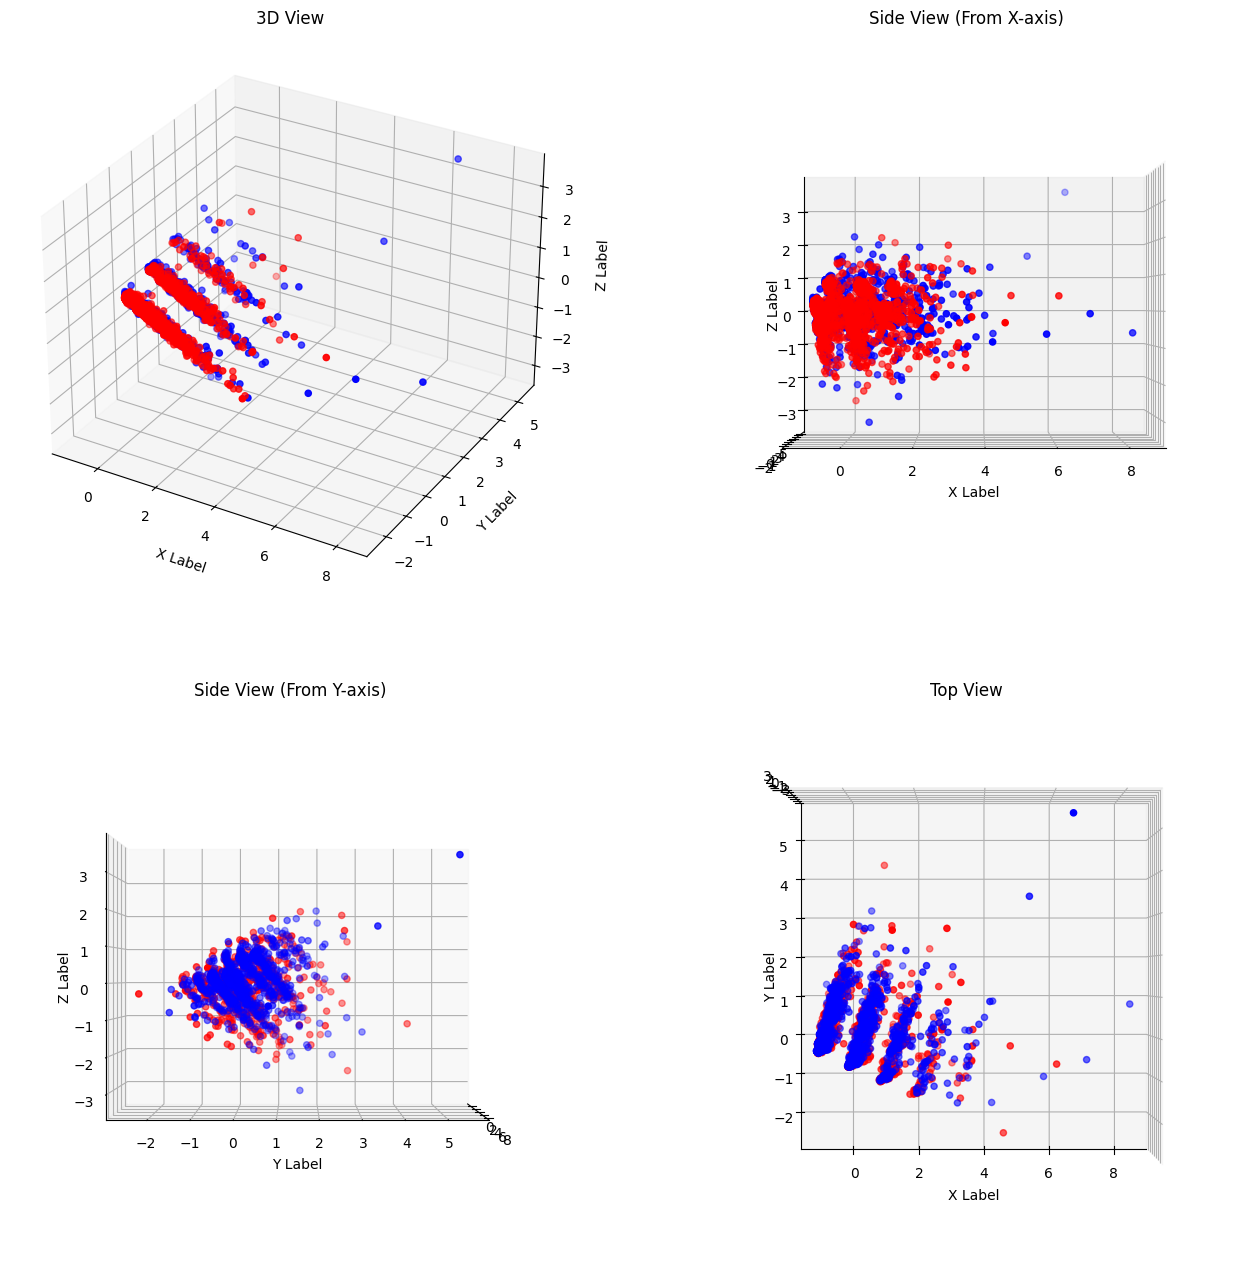

In [65]:
scores = [0, 1]
col = ['red', 'blue']

fig = plt.figure(figsize = (16, 16))

# Plot 1
ax = fig.add_subplot(2,2,1, projection='3d')

for c, sc in zip(col, scores):
    xs = data_reduced[data['score'] == sc].T[0]
    ys = data_reduced[data['score'] == sc].T[1]
    zs = data_reduced[data['score'] == sc].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('3D View'); ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')


# Plot 2
ax = fig.add_subplot(2,2,2, projection='3d')

for c, sc in zip(col, scores):
    xs = data_reduced[data['score'] == sc].T[0]
    ys = data_reduced[data['score'] == sc].T[1]
    zs = data_reduced[data['score'] == sc].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From X-axis)'); ax.set_xlabel('\nX Label'); ax.set_zlabel('\nZ Label')

ax.view_init(0,-90,0)


# Plot 3
ax = fig.add_subplot(2,2,3, projection='3d')

for c, sc in zip(col, scores):
    xs = data_reduced[data['score'] == sc].T[0]
    ys = data_reduced[data['score'] == sc].T[1]
    zs = data_reduced[data['score'] == sc].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Side View (From Y-axis)'); ax.set_ylabel('\nY Label'); ax.set_zlabel('\nZ Label')

ax.view_init(0,0,0)


# Plot 4
ax = fig.add_subplot(2,2,4, projection='3d')

for c, sc in zip(col, scores):
    xs = data_reduced[data['score'] == sc].T[0]
    ys = data_reduced[data['score'] == sc].T[1]
    zs = data_reduced[data['score'] == sc].T[2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_title('Top View'); ax.set_xlabel('\nX Label'); ax.set_ylabel('\nY Label')

ax.view_init(90,-90,0)


plt.show()

**Ans:** From the plots above, we can see that the X label, which indicates PC1 (the 1st principal component), explains the most variance in the data, followed by the Y label (PC2), and Z label (PC3). We can also see that the data points with different scores are not clustered and separated clearly from data points with other scores, and a pattern is still difficult to find here. This means that the PCA may not be providing us with an important information. Moreover, from the screeplot that I have plotted earlier, the optimal n_components obtained is 1, so increasing it to 3 won't bring a meaningful impact.

### 3.5 Attribute Transformation / Aggregation

In [66]:
data_counts.shape

(2983, 5155)

In [67]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
term_frequencies[:5]

array([ 1, 36,  3,  2,  4], dtype=int64)

**Exercise 13**

Use plotly to visualize the term frequencies.

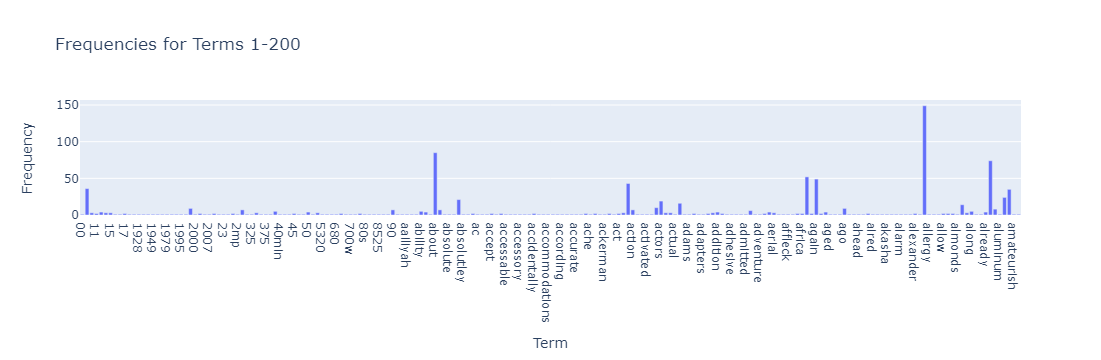

In [68]:
fig = px.bar(x=count_vect.get_feature_names_out()[:200], y=term_frequencies[:200],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Frequencies for Terms 1-200')
fig.show()

**Exercise 14**

Efficiently reduce the number of terms.

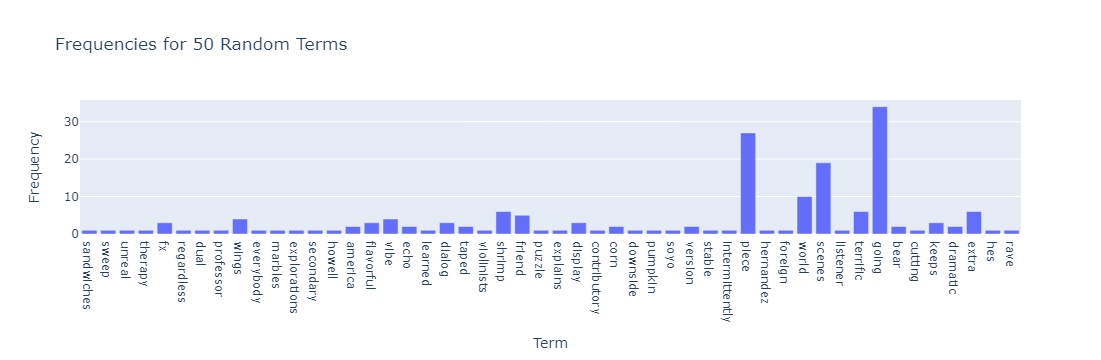

In [69]:
idx = np.random.choice(data_counts.shape[1], size=50, replace=False)
x = [count_vect.get_feature_names_out()[i] for i in idx]
y = [term_frequencies[i] for i in idx]

fig = px.bar(x=x, y=y,
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Frequencies for 50 Random Terms')
fig.show()

**Exercise 15**

Sort terms by frequency.

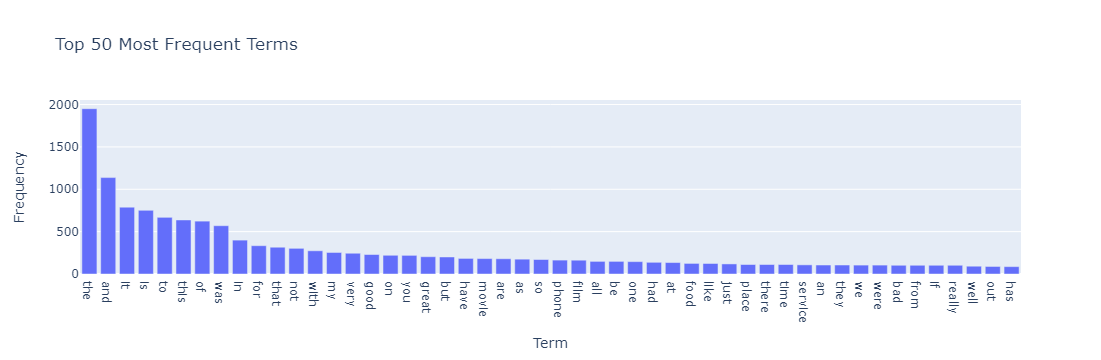

In [70]:
names = count_vect.get_feature_names_out()
freq = term_frequencies

combined = list(zip(names, freq))
sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_freq)

fig = px.bar(x=names[:50], y=freq[:50],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Top 50 Most Frequent Terms')
fig.show()

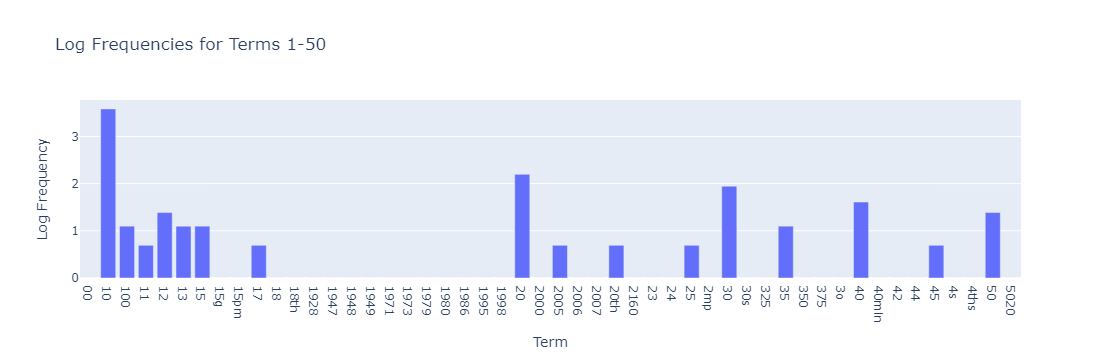

In [71]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

fig = px.bar(x=count_vect.get_feature_names_out()[:50], y=term_frequencies_log[:50],
             labels={
                     'x': 'Term',
                     'y': 'Log Frequency',
             },
             title='Log Frequencies for Terms 1-50')
fig.show()

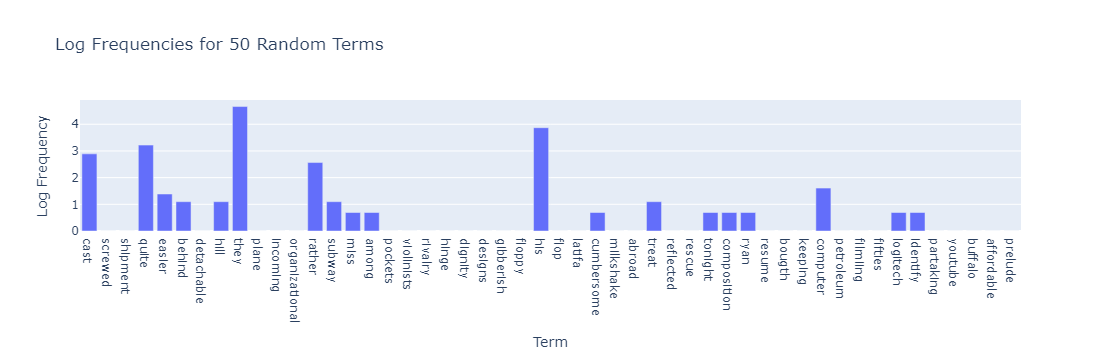

In [72]:
idx = np.random.choice(data_counts.shape[1], size=50, replace=False)
x = [count_vect.get_feature_names_out()[i] for i in idx]
y = [term_frequencies_log[i] for i in idx]

fig = px.bar(x=x, y=y,
             labels={
                     'x': 'Term',
                     'y': 'Log Frequency',
             },
             title='Log Frequencies for 50 Random Terms')
fig.show()

### 3.6 Discretization / Binarization

**Exercise 16**

Generate the binarization using the score column.

In [73]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(data.score)
data['bin_score'] = mlb.transform(data['score']).tolist()
data.head()

sentence  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   
4                                  The mic is great.      1   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]

Actually, this part is redundant, because our score column is already in binary form.

### 4. Data Exploration

In [74]:
idx = np.random.choice(3000, 3, replace=False)

document_to_transform_1 = []
random_record_1 = data.iloc[idx[0]]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[idx[1]]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[idx[2]]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [75]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We loved the place.']
["too bad cause I know it's family owned, I really wanted to like this place."]
['The results, well, are a shame. ']


In [76]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Count Vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Count Vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [77]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.138675
Cosine Similarity using count bw 1 and 3: 0.223607
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_16616\1433203154.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_16616\1433203154.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_16616\1433203154.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_16616\1433203154.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

## Part III

New tasks on the new dataset

### New Data Visualizations

In this part I decided to use various new data visualization methods, such as:
- Sentiment Polarity Distribution
- Term Frequency without Stop Words
- Review Length Distribution
- Log Word Count Distribution
- Word Clouds
- Words in Positive vs Negative Reviews
- Review Type in Short vs Long Reviews

#### Sentiment Polarity Distribution

This is to visualize the distribution of the predicted sentiment polarity values of each sentences, predicted using TextBlob, where a sentiment polarity value of -1 means a negative text, 0 means neutral, and 1 means a positive text.

In [78]:
data['sentiment_polarity'] = data.sentence.map(lambda i: TextBlob(i).sentiment.polarity)

In [79]:
print('5 Reviews with the Most Positive Sentiment Polarity:\n')
sentences = data.sort_values(by='sentiment_polarity', ascending=False)[:5].sentence
for i in sentences:
    print(i)

5 Reviews with the Most Positive Sentiment Polarity:

So flavorful and has just the perfect amount of heat.
Great price, too!
The selection of food was not the best.
How awesome is that.
Great price also!


In [80]:
print('5 Reviews with the Most Negative Sentiment Polarity:\n')
sentences = data.sort_values(by='sentiment_polarity')[:5].sentence
for i in sentences:
    print(i)

5 Reviews with the Most Negative Sentiment Polarity:

The WORST EXPERIENCE EVER.
Even the squibs look awful. 
How awful she is! 
The service was terrible though.
One of the worst shows of all time. 


In [81]:
print('10 Reviews with the Most Neutral Sentiment Polarity:\n')
mid_data = data[(data.sentiment_polarity >= -0.05) & (data.sentiment_polarity <= 0.05)][:10]
for i in range(10):
    #print(mid_data.iloc[i].sentiment_polarity)
    print(mid_data.iloc[i].sentence)

10 Reviews with the Most Neutral Sentiment Polarity:

So there is no way for me to plug it in here in the US unless I go by a converter.
If you are Razr owner...you must have this!
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.
I advise EVERYONE DO NOT BE FOOLED!
It clicks into place in a way that makes you wonder how long that mechanism would last.
I went on Motorola's website and followed all directions, but could not get it to pair again.
I bought it for my mother and she had a problem with the battery.
I didn't think that the instructions provided were helpful to me.
People couldnt hear me talk and I had to pull out the earphone and talk on the phone.
Doesn't hold charge.


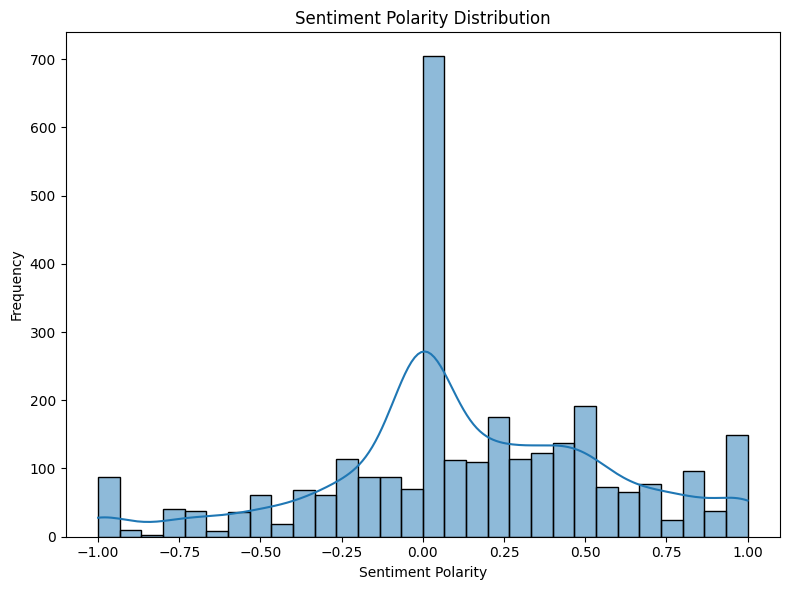

In [82]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data.sentiment_polarity, kde=True).set(
    title='Sentiment Polarity Distribution', xlabel='Sentiment Polarity', ylabel='Frequency')
plt.tight_layout()
plt.show()

I personally think that the predicted sentiment polarity values here are not accurate enough. Because as we can see, when I try to print 5 sentences with the highest sentiment polarity values (indicating a positive sentence), one of the questions are "The selection of food was not the best.". Also, we can see that a lot of the sentences are predicted with a neutral sentiment polarity value (close to 0), whereas according to the dataset's description, it should contain no neutral reviews, as sentences that have a clearly positive or negative connotaton are attempted to be selected for this dataset.

#### Term Frequency without Stop Words

This visualization is similar to the one used on the Master notebook, except for now, the stop words (such as "the", "with", "in", etc) is not included, so we can see more meaningful words here.

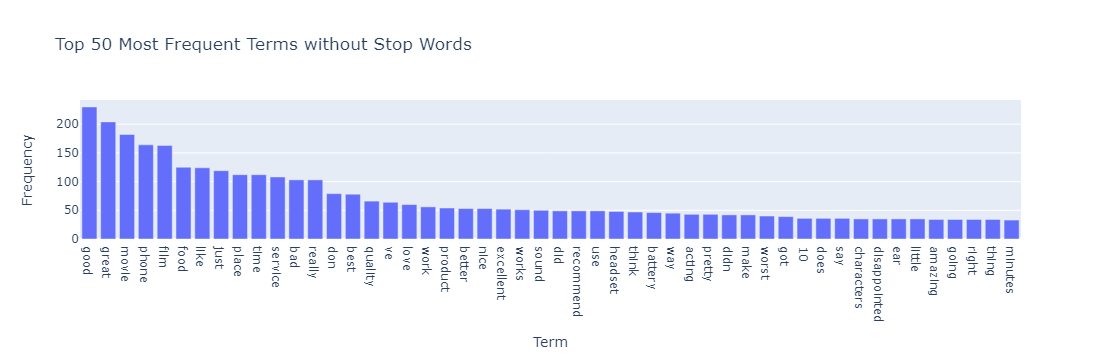

In [83]:
count_vect_sw = CountVectorizer(stop_words='english')
data_counts_sw = count_vect_sw.fit_transform(data.sentence)
term_frequencies_sw = np.asarray(data_counts_sw.sum(axis=0))[0]
names = count_vect_sw.get_feature_names_out()
freq = term_frequencies_sw

combined = list(zip(names, freq))
sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_freq)

fig = px.bar(x=names[:50], y=freq[:50],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Top 50 Most Frequent Terms without Stop Words')
fig.show()

#### Review Length Distribution

This visualization helps us to see the distribution of the review's lengths.

In [84]:
review_len = [len(nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(i)) for i in data.sentence]

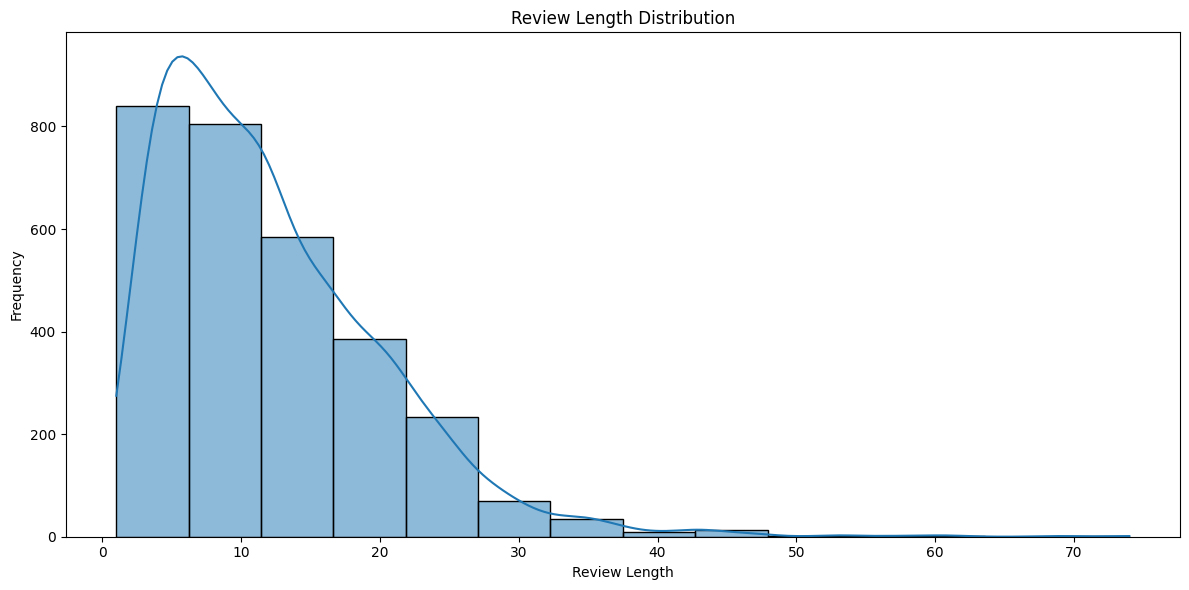

In [85]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(review_len, kde=True, bins=14).set(title='Review Length Distribution', xlabel='Review Length', ylabel='Frequency')
plt.tight_layout()
plt.show()

As we can see from the visualization, we can see that most of the review lengths lies in the 1-20 words range.

#### Log Word Count Distribution

This visualization helps us to see the distribution of the log word counts.

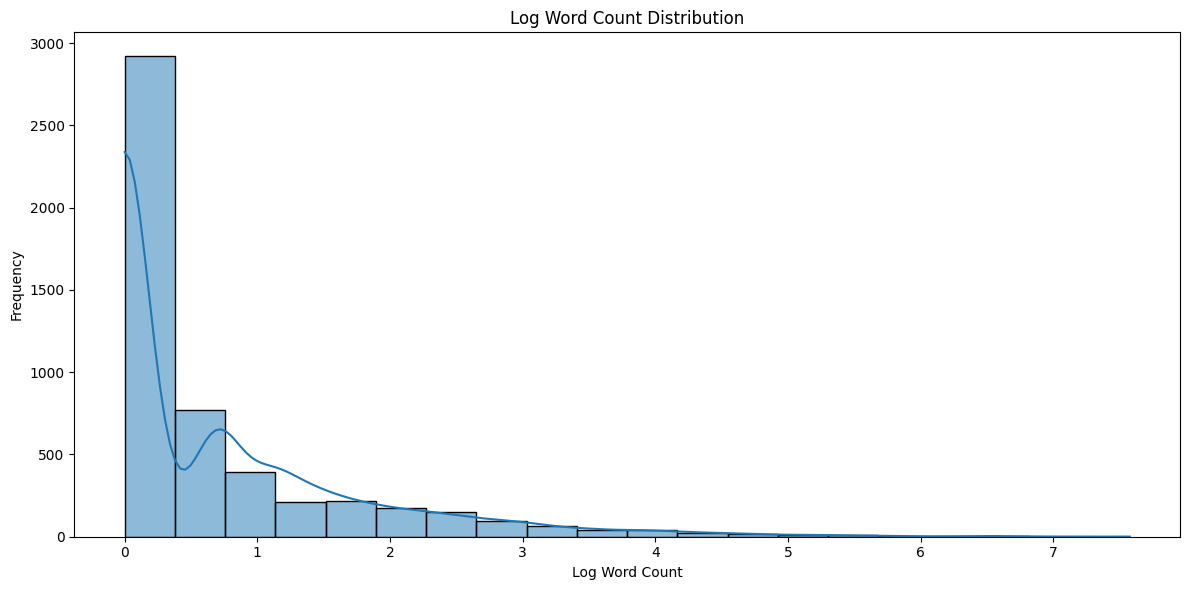

In [86]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(term_frequencies_log, kde=True, bins=20).set(title='Log Word Count Distribution', xlabel='Log Word Count', ylabel='Frequency')
plt.tight_layout()
plt.show()

From the visualization, we can see that most of the words in the whole document have a log count of less than 1.

#### Word Cloud for All Documents

The word cloud helps us to see which words appears the most frequent across all documents. The bigger the words appears on the word cloud, the more frequent it can be found across the whole documents.

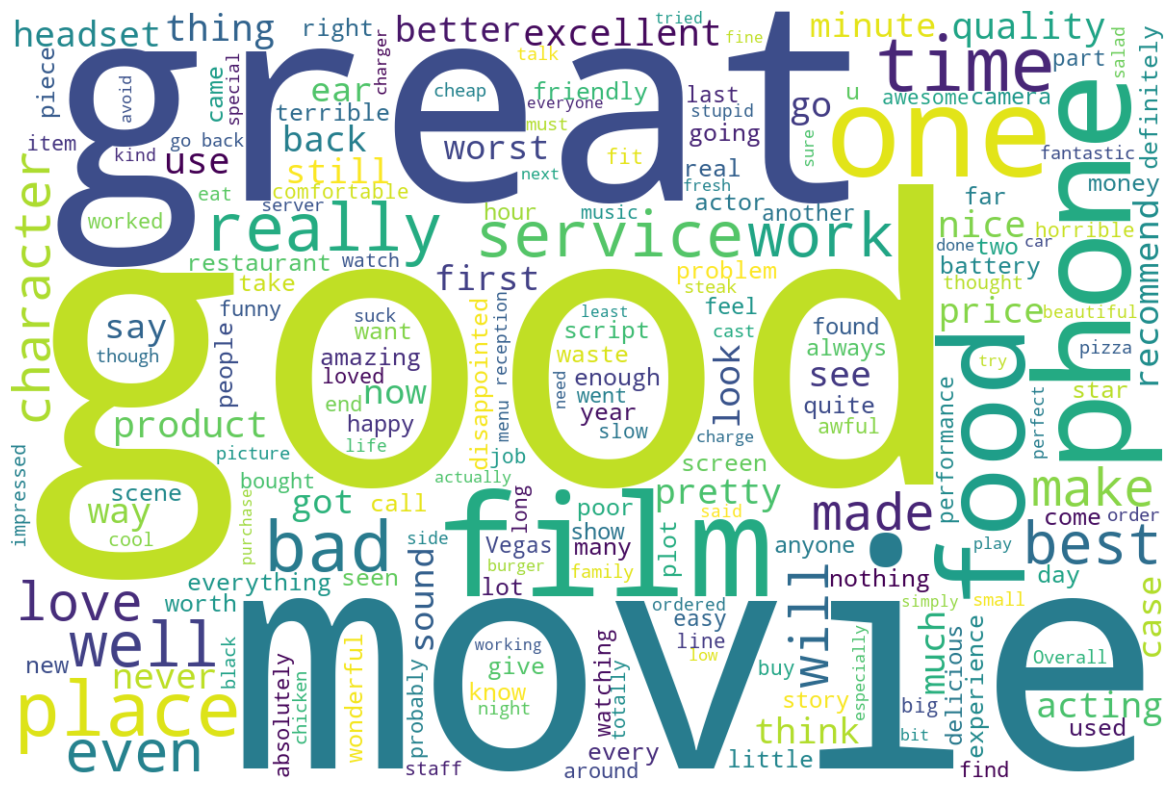

In [87]:
all_sentences = " ".join(i for i in data.sentence)
wc = WordCloud(background_color='white', width=1200, height=800).generate(all_sentences)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Comparison between Positive and Negative Reviews vs their Terms

In this part, the words that are mostly contained in the Positive vs Negative reviews are compared. This is done  by plotting their frequency and the word clouds of each category of the reviews.

In [88]:
data0 = data[data.score == 0]
data1 = data[data.score == 1]

1. Negative Reviews (Score = 0)

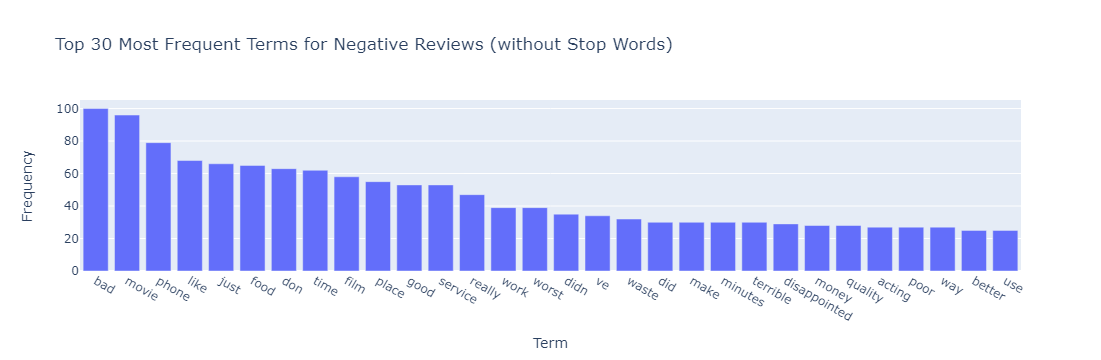

In [89]:
count_vect0 = CountVectorizer(stop_words='english')
data_counts0 = count_vect0.fit_transform(data0.sentence)
term_frequencies0 = np.asarray(data_counts0.sum(axis=0))[0]
names = count_vect0.get_feature_names_out()
freq = term_frequencies0

combined = list(zip(names, freq))
sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_freq)

fig = px.bar(x=names[:30], y=freq[:30],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Top 30 Most Frequent Terms for Negative Reviews (without Stop Words)')
fig.show()

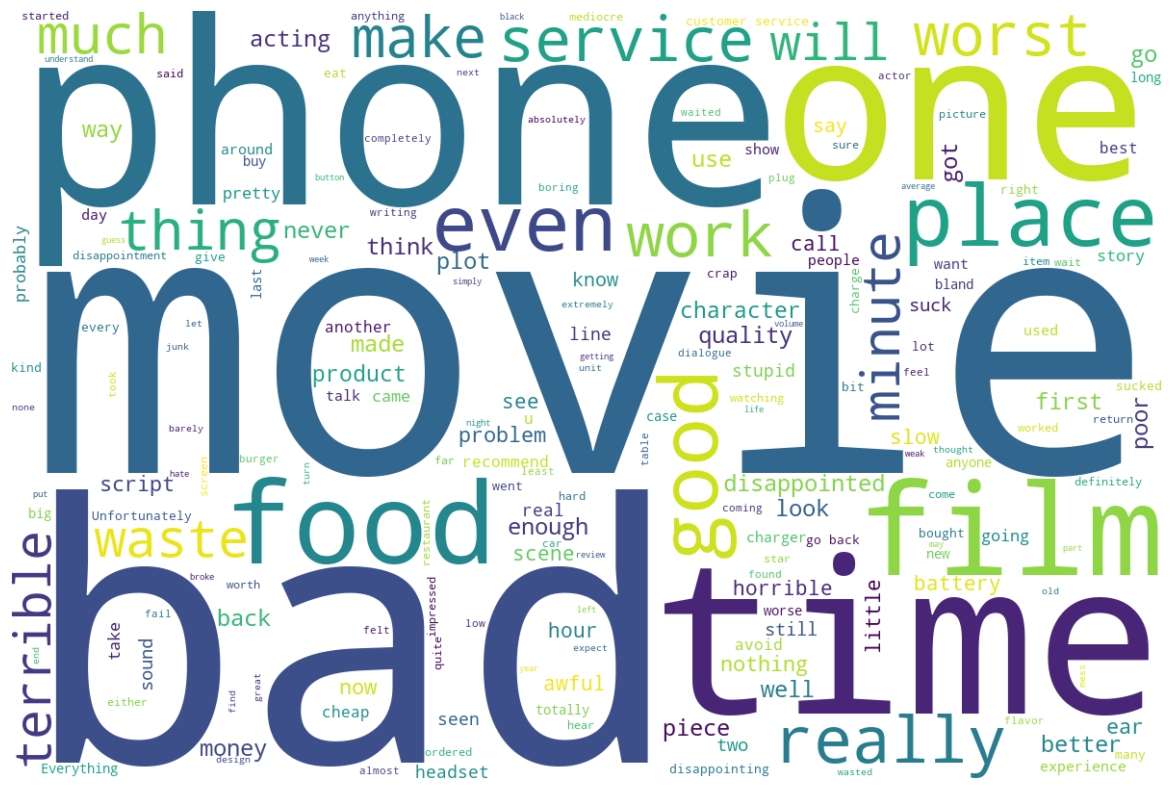

In [90]:
all_sentences0 = " ".join(i for i in data0.sentence)
wc = WordCloud(background_color='white', width=1200, height=800).generate(all_sentences0)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

2. Positive Reviews (Score = 1)

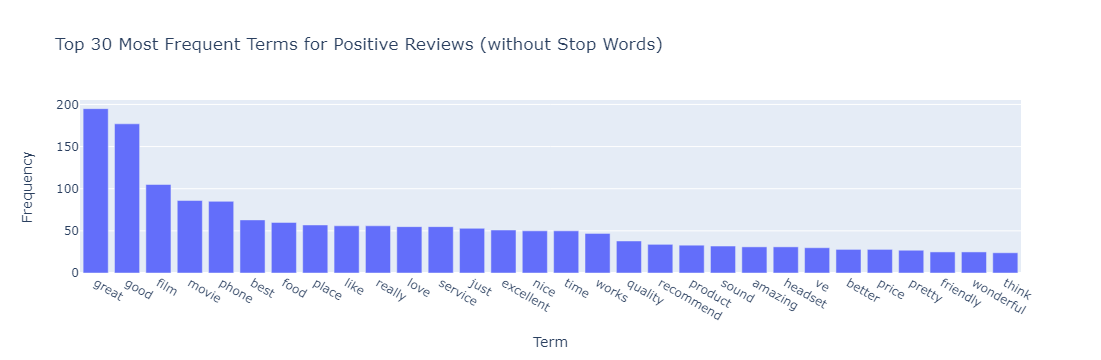

In [91]:
count_vect1 = CountVectorizer(stop_words='english')
data_counts1 = count_vect1.fit_transform(data1.sentence)
term_frequencies1 = np.asarray(data_counts1.sum(axis=0))[0]
names = count_vect1.get_feature_names_out()
freq = term_frequencies1

combined = list(zip(names, freq))
sorted_freq = sorted(combined, key=lambda x: x[1], reverse=True)
names, freq = zip(*sorted_freq)

fig = px.bar(x=names[:30], y=freq[:30],
             labels={
                     'x': 'Term',
                     'y': 'Frequency',
             },
             title='Top 30 Most Frequent Terms for Positive Reviews (without Stop Words)')
fig.show()

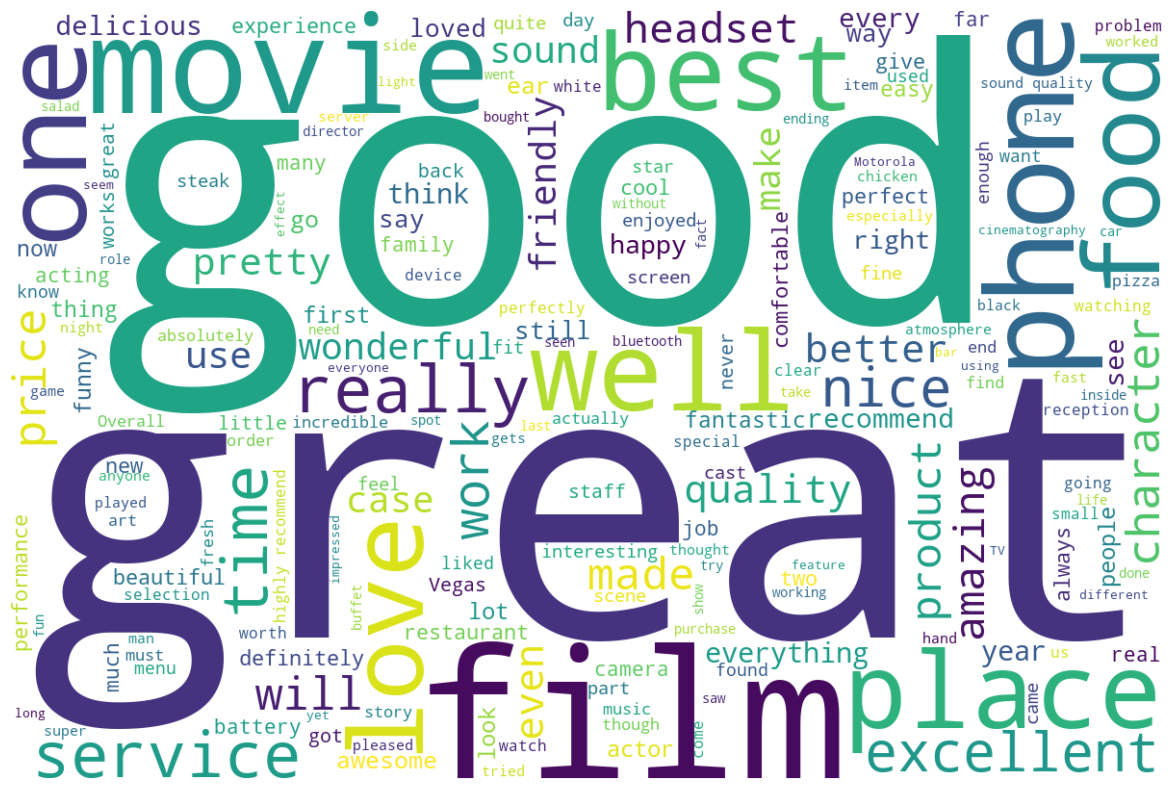

In [92]:
all_sentences1 = " ".join(i for i in data1.sentence)
wc = WordCloud(background_color='white', width=1200, height=800).generate(all_sentences1)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Comparison between the Review Lengths vs Positive and Negative Reviews

In this part, I tried to compare the relationship of the review lengths vs the category of the review itself. To perform this, first I splitted the data into two groups, one with a review length of less than 5, called the short reviews group, and the rest will be the long reviews group. Then, I compared the distribution of the review types (positive vs negative) on those two groups.

In [93]:
threshold = np.array(5)
data_short = data[review_len < threshold]
data_long = data[review_len >= threshold]

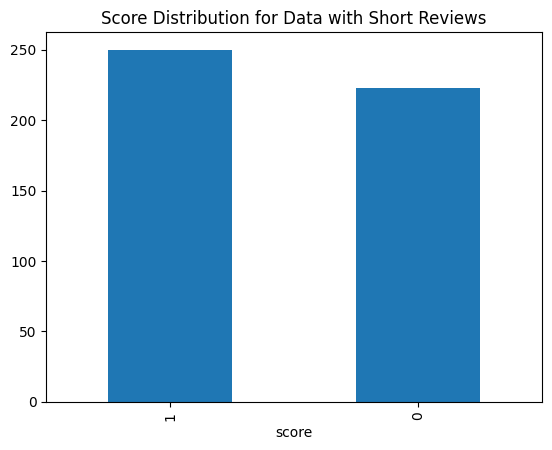

In [94]:
upper_bound = max(data_short.score.value_counts() + 100)
data_short.score.value_counts().plot(kind='bar',
                                     title='Score Distribution for Data with Short Reviews')
plt.show()

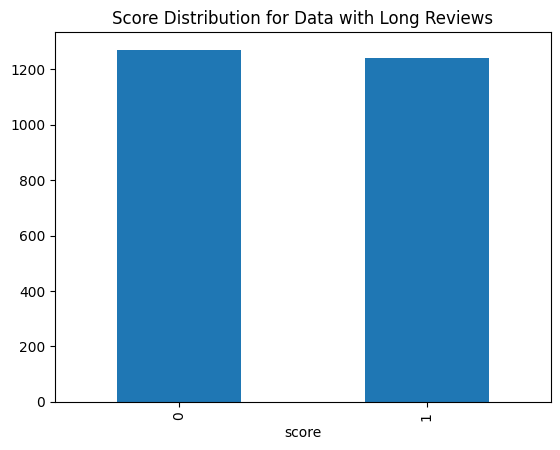

In [95]:
upper_bound = max(data_long.score.value_counts() + 100)
data_long.score.value_counts().plot(kind='bar',
                                    title='Score Distribution for Data with Long Reviews')
plt.show()

From the plots above, we can see that the short reviews group contains slightly more positive reviews, while the long reviews group contains slightly more negative reviews.

### Generate TF-IDF Features

The TF-IDF (term frequency-inverse document frequency) is a statistical measure that is used to extract features from text data, by evaluating how relevant / important a word is to a document, in a collection of documents. The relevance of those words is represented by a weight, calculated by multiplying the term frequency in the document, and the inverse document frequency of the word across a set of documents.

For this part, I will apply the TF-IDF transformation on the whole dataset, using TfidfVectorizer(), and see what it will look like after being transformed.

Later on, when we want to train a model using the TF-IDF features, we will need to fit the TfidfVectorizer() on the training data **ONLY**, and then use the fitted vectorizer to transform the test data. This is because, the test data is a part of our data that is "unseen" before, and can only be used after training is done, to evaluate the performance of the model.

In [137]:
tfidf_vect = TfidfVectorizer()
tfidf_features = tfidf_vect.fit_transform(data.sentence)

In [97]:
print(tfidf_features.shape)

(2983, 5155)


#### See what the data looks like

In [98]:
print(tfidf_features[0])

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [99]:
tfidf_vect.get_feature_names_out()[1013]

'converter'

In [100]:
tfidf_vect.get_feature_names_out()[647]

'by'

In [101]:
tfidf_vect.get_feature_names_out()[1982]

'go'

#### Visualize data with document-term matrix

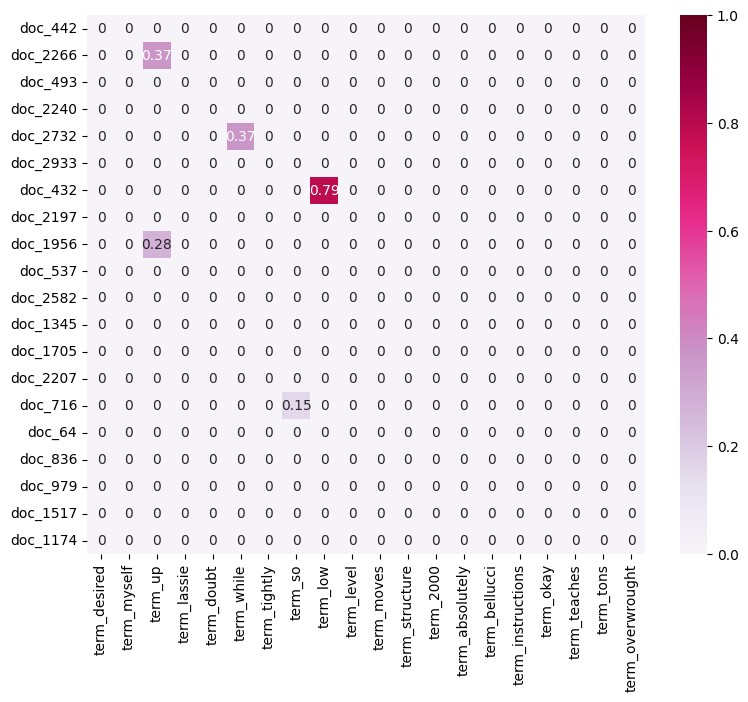

In [151]:
x_idx = np.random.choice(tfidf_features.shape[1], size=20, replace=False)
y_idx = np.random.choice(tfidf_features.shape[0], size=20, replace=False)

plot_x = ["term_"+str(tfidf_vect.get_feature_names_out()[i]) for i in x_idx]
plot_y = ["doc_"+ str(data.index[i]) for i in y_idx]
plot_z = tfidf_features[y_idx, :][:, x_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### TF-IDF weight sum of each terms

In [103]:
term_weights = np.asarray(tfidf_features.sum(axis=0))[0]

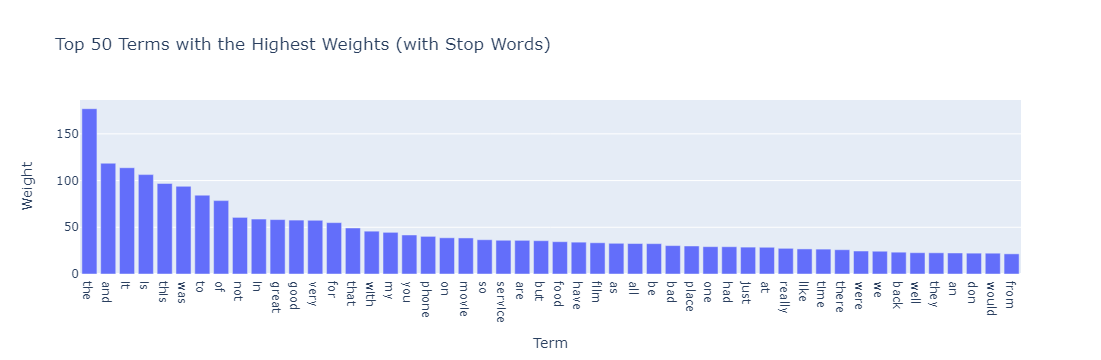

In [104]:
names = tfidf_vect.get_feature_names_out()
weights = term_weights

combined = list(zip(names, weights))
sorted_weight = sorted(combined, key=lambda x: x[1], reverse=True)
names, weights = zip(*sorted_weight)

fig = px.bar(x=names[:50], y=weights[:50],
             labels={
                     'x': 'Term',
                     'y': 'Weight',
             },
             title='Top 50 Terms with the Highest Weights (with Stop Words)')
fig.show()

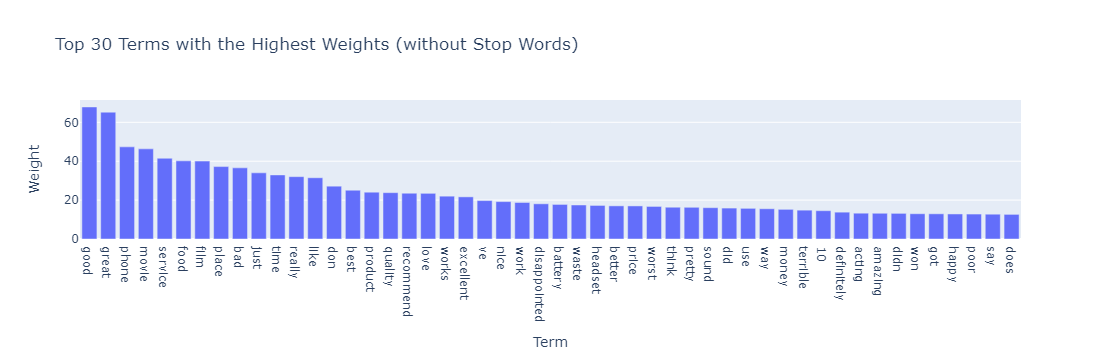

In [105]:
tfidf_vect_sw = TfidfVectorizer(stop_words='english')
tfidf_features_sw = tfidf_vect_sw.fit_transform(data.sentence)
term_weights_sw = np.asarray(tfidf_features_sw.sum(axis=0))[0]
names = tfidf_vect_sw.get_feature_names_out()
weights = term_weights_sw

combined = list(zip(names, weights))
sorted_weight = sorted(combined, key=lambda x: x[1], reverse=True)
names, weights = zip(*sorted_weight)

fig = px.bar(x=names[:50], y=weights[:50],
             labels={
                     'x': 'Term',
                     'y': 'Weight',
             },
             title='Top 30 Terms with the Highest Weights (without Stop Words)')
fig.show()

### Classification with Naive Bayes Classifier

In this part, I decided to use a Multinomial Naive Bayes Classifier as the model that will classify the records into their categories, because this specific version of the Naive Bayes Classifier is more suited towards the data that we have, which is in the form of word vector counts and tf-idf vectors.

#### Model using TF-IDF Features

First, we will only use the TF-IDF features to build the classifier model.

##### Prepare Data

Before training the classifier model, we will prepare the data so that it can be properly used by the model for training and evaluation.

The methods include:
1. Splitting the data into X (features) and y (labels), and then into training and testing sets
2. Fit a TF-IDF vectorizer into the training data, and use it to transform the testing data, as explained above

1. Split into train and test data

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    data.sentence, data.score, test_size=0.3, random_state=0
)

2. Generate TF-IDF features

In [107]:
tfidf_vect = TfidfVectorizer()
X_train = tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

In [108]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2088, 4153)
y_train shape: (2088,)
X_test shape: (895, 4153)
y_test shape: (895,)


##### Start Training & Make Predictions

Now, we are ready to start training the classifier model, and use it to make predictions.

This part is relatively simple, and consists of these two steps:
1. Train the model by fitting it into the training data
2. Use the trained model to make predictions using on the testing data

1. Train model using training data

In [109]:
tfidf_model = MultinomialNB()
tfidf_model.fit(X_train, y_train)

MultinomialNB()

2. Make predictions using the trained model

In [110]:
y_train_pred = tfidf_model.predict(X_train)
y_test_pred = tfidf_model.predict(X_test)

##### Model Evaluation

Now, we can use the predictions to evaluate the performance of our model.

To evaluate the model, we will use these 3 metrics:
- Accuracy score: The fraction of correct predictions
- F1-score: The harmonic mean of the precision and recall
- Confusion matrix: Display the number of true negatives, false negatives, true positives, and false positives

The evaluation will be performed both on the training data and testing data, so that we can see whether our model is overfitting or not.

In [111]:
print('Accuracy on Train Data: %.3f' % accuracy_score(y_train, y_train_pred))
print('F1-score on Train Data: %.3f' % f1_score(y_train, y_train_pred))

print('Accuracy on Test Data: %.3f' % accuracy_score(y_test, y_test_pred))
print('F1-score on Test Data: %.3f' % f1_score(y_test, y_test_pred))

Accuracy on Train Data: 0.949
F1-score on Train Data: 0.949
Accuracy on Test Data: 0.827
F1-score on Test Data: 0.824


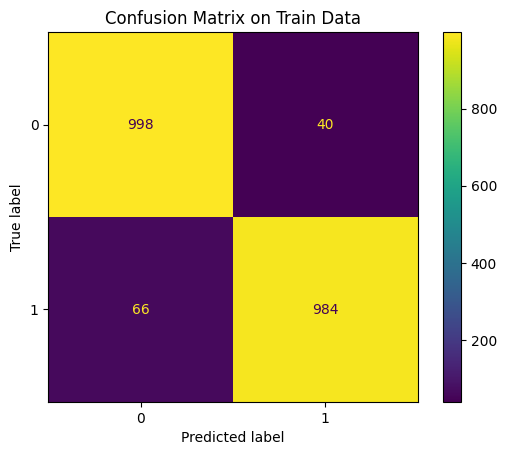

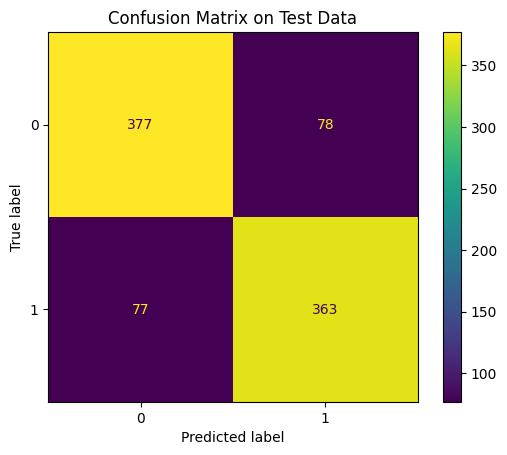

In [112]:
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=tfidf_model.classes_)
disp.plot()
plt.title('Confusion Matrix on Train Data')
plt.show()

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=tfidf_model.classes_)
disp.plot()
plt.title('Confusion Matrix on Test Data')
plt.show()

Notice that the performance on the training data is very high, but the performance on the test data is significantly lower. This is a strong indication that our model might be overfitting the training data.

##### Prevent Overfit

Let's re-train our model and try to make use of the alpha parameter of MultinomialNB(), to perform Laplace/Lidstone smoothing, which may help us to prevent overfitting. Let's try setting alpha=50 for this model.

In [113]:
tfidf_model = MultinomialNB(alpha=50)
tfidf_model.fit(X_train, y_train)

y_train_pred = tfidf_model.predict(X_train)
y_test_pred = tfidf_model.predict(X_test)

print('Accuracy on Train Data: %.3f' % accuracy_score(y_train, y_train_pred))
print('F1-score on Train Data: %.3f' % f1_score(y_train, y_train_pred))
print('Accuracy on Test Data: %.3f' % accuracy_score(y_test, y_test_pred))
print('F1-score on Test Data: %.3f' % f1_score(y_test, y_test_pred))

Accuracy on Train Data: 0.839
F1-score on Train Data: 0.852
Accuracy on Test Data: 0.781
F1-score on Test Data: 0.802


As we can see from the results above, we have successfully prevented overfitting by utilizing the parameter alpha to perform smoothing.

#### Model using Word Frequency Features

This part is the same as before, except now, we will use the Word Frequency Features to train the classifier model.

##### Prepare Data

Before training the classifier model, we will prepare the data so that it can be properly used by the model for training and evaluation.

The methods include:
1. Splitting the data into X (features) and y (labels), and then into training and testing sets
2. Fit a count vectorizer into the training data, and use it to transform the testing data. The concept as to why we shouldn't fit the vectorizer into the whole dataset, is the same as the concept explained before, about fitting the TF-IDF vectorizer

1. Split into train and test data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    data.sentence, data.score, test_size=0.3, random_state=125
)

2. Generate Word Frequency features

In [115]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

In [116]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2088, 4226)
y_train shape: (2088,)
X_test shape: (895, 4226)
y_test shape: (895,)


##### Start Training & Make Predictions

Now, we are ready to start training the classifier model, and use it to make predictions.

This part is relatively simple, and consists of these two steps:
1. Train the model by fitting it into the training data
2. Use the trained model to make predictions using on the testing data

1. Train model using training data

In [117]:
wordfreq_model = MultinomialNB()
wordfreq_model.fit(X_train, y_train)

MultinomialNB()

2. Make predictions using the trained model

In [118]:
y_train_pred = wordfreq_model.predict(X_train)
y_test_pred = wordfreq_model.predict(X_test)

##### Model Evaluation

Now, we can use the predictions to evaluate the performance of our model.

To evaluate the model, we will use these 3 metrics:
- Accuracy score: The fraction of correct predictions
- F1-score: The harmonic mean of the precision and recall
- Confusion matrix: Display the number of true negatives, false negatives, true positives, and false positives

The evaluation will be performed both on the training data and testing data, so that we can see whether our model is overfitting or not.

In [119]:
print('Accuracy on Train Data: %.3f' % accuracy_score(y_train, y_train_pred))
print('F1-score on Train Data: %.3f' % f1_score(y_train, y_train_pred))

print('Accuracy on Test Data: %.3f' % accuracy_score(y_test, y_test_pred))
print('F1-score on Test Data: %.3f' % f1_score(y_test, y_test_pred))

Accuracy on Train Data: 0.953
F1-score on Train Data: 0.952
Accuracy on Test Data: 0.834
F1-score on Test Data: 0.829


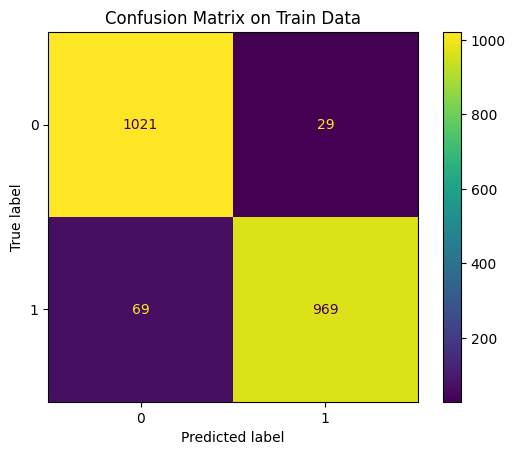

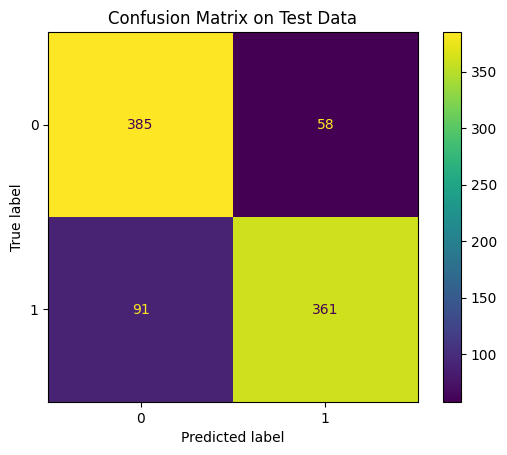

In [120]:
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=tfidf_model.classes_)
disp.plot()
plt.title('Confusion Matrix on Train Data')
plt.show()

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=tfidf_model.classes_)
disp.plot()
plt.title('Confusion Matrix on Test Data')
plt.show()

Again, we can see that the performance on the training data is very high, but the performance on the test data is significantly lower, a strong indication that our model might be overfitting the training data.

##### Prevent Overfit

The method to prevent overfitting is still the same as before, which is by using the alpha parameter. For this model, let's try an alpha value of 40.

In [121]:
wordfreq_model = MultinomialNB(alpha=40)
wordfreq_model.fit(X_train, y_train)

y_train_pred = wordfreq_model.predict(X_train)
y_test_pred = wordfreq_model.predict(X_test)

print('Accuracy on Train Data: %.3f' % accuracy_score(y_train, y_train_pred))
print('F1-score on Train Data: %.3f' % f1_score(y_train, y_train_pred))
print('Accuracy on Test Data: %.3f' % accuracy_score(y_test, y_test_pred))
print('F1-score on Test Data: %.3f' % f1_score(y_test, y_test_pred))

Accuracy on Train Data: 0.840
F1-score on Train Data: 0.838
Accuracy on Test Data: 0.759
F1-score on Test Data: 0.760


As we can see from the results above, we have successfully prevented overfitting by utilizing the parameter alpha to perform smoothing.

## Part IV

Inefficient parts from the lab? How to improve?

### Use more data cleaning techniques

The text data still includes unimportant and irrelevant words and objects, such as:

- Stop words (such as "the", "at", "with", etc)
- Irrelevant words, such as names, emails, addresses, phone numbers, etc
- Punctuations, special characters, and extra white spaces

These words and objects doesn't contain meaningful information that can help our data analysis and exploration, as well as the model's training process. They will only just bring noise, and a negative yet unimportant impact to our work. So, we need to do more cleaning on our text data to get rid of those words and objects.

Python's re (regular expression) library can really help to do these kinds of stuff, so let's use it for this part.

In [122]:
import re

#### Examples:

##### Stop Words

In [123]:
text = "I'm eating a cake & drinking a cup of soda while watching TV at the living room."
print('Text:', text)

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
print('With stop words:', analyze(text))

count_vect = CountVectorizer(stop_words='english')
analyze = count_vect.build_analyzer()
print('Without stop words:', analyze(text))

Text: I'm eating a cake & drinking a cup of soda while watching TV at the living room.
With stop words: ['eating', 'cake', 'drinking', 'cup', 'of', 'soda', 'while', 'watching', 'tv', 'at', 'the', 'living', 'room']
Without stop words: ['eating', 'cake', 'drinking', 'cup', 'soda', 'watching', 'tv', 'living', 'room']


##### Words Removal

In this example let's try to remove emails and phone numbers from a text

In [124]:
text = "If you're interested in this job, please send an e-mail to jim@gmail.com or send a text to 081-7777777"
print('Text:', text)

clean_text = re.sub(r'\S+@\S+', '', text) # remove email
clean_text = re.sub(r'\d+(\s*[-./]?\s*\d+)*', '', clean_text) # remove phone number
print('Clean Text:', clean_text)

count_vect = CountVectorizer(stop_words='english')
analyze = count_vect.build_analyzer()
print('Tokens before Words Removal:', analyze(text))
print('Tokens after Words Removal:', analyze(clean_text))

Text: If you're interested in this job, please send an e-mail to jim@gmail.com or send a text to 081-7777777
Clean Text: If you're interested in this job, please send an e-mail to  or send a text to 
Tokens before Words Removal: ['interested', 'job', 'send', 'mail', 'jim', 'gmail', 'com', 'send', 'text', '081', '7777777']
Tokens after Words Removal: ['interested', 'job', 'send', 'mail', 'send', 'text']


### Use lemmatization

Lemmatization is the process of transforming a word to its root form (example: improvement -> improve, changing -> change, etc). We can use lemmatization, instead of tokenizing the words from the text data as they are, as it has its own benefits compared to tokenization. The benefits include:

- Reduced vocabulary size
- Can lead to more meaningful results
- Easier for the model to interpret, and for us to interpret the results as well
- The meaning of each words are still retained
- May reduce noise

#### Example:

In [125]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print('crashes becomes', lemmatizer.lemmatize('crashes'))
print('bugs becomes', lemmatizer.lemmatize('bug'))

crashes becomes crash
bugs becomes bug


### Create new features, such as bi-grams, tri-grams, etc

The example code only generates the unigrams feature using the text data, but we can also create additional features such as bi-grams (2 words combination), tri-grams (3 words combination), or n-grams (n words combination).

#### Examples:

##### Bi-grams

In [126]:
word_data = "This city is also known as the city of heroes"
nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(nltk_tokens)))

[('This', 'city'), ('city', 'is'), ('is', 'also'), ('also', 'known'), ('known', 'as'), ('as', 'the'), ('the', 'city'), ('city', 'of'), ('of', 'heroes')]


##### Tri-grams

In [127]:
word_data = "This city is also known as the city of heroes"
nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.trigrams(nltk_tokens)))

[('This', 'city', 'is'), ('city', 'is', 'also'), ('is', 'also', 'known'), ('also', 'known', 'as'), ('known', 'as', 'the'), ('as', 'the', 'city'), ('the', 'city', 'of'), ('city', 'of', 'heroes')]


### Use screeplot to determine the optimal n_components for PCA

In the exercises, we just directly inputted a number as the n_components for PCA. But actually, we can determine the optimal value for that number by using a screeplot (already implemented above).

#### Example:

In [128]:
pca = PCA(n_components=10).fit(data_counts.toarray())
sdev = np.sqrt(pca.explained_variance_)
eigenvalues = sdev**2 / sum(sdev**2)

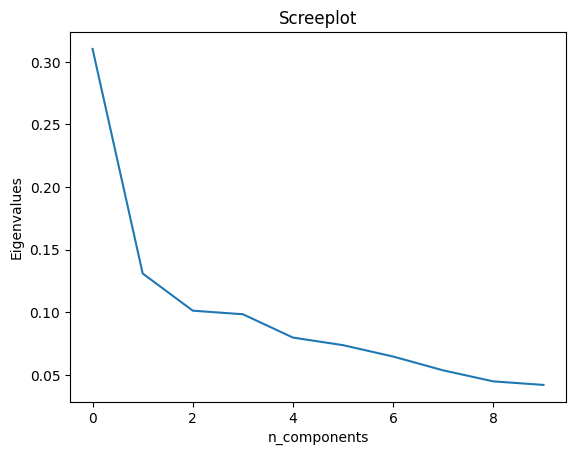

In [129]:
plt.plot(eigenvalues)
plt.title('Screeplot')
plt.xlabel('n_components')
plt.ylabel('Eigenvalues')
plt.show()

For example here, to determine the optimal n_components from the screeplot above, we need to find the point where the slope of the screeplot changes abruptly, forming an elbow-like shape. The x-axis of this point indicates the optimal number of components for PCA.

### Use dummy encoding with n-1 columns for binarization

In the master part of the lab, we are asked to binarize 4 categorical variables into binary variables, with 4 columns. But actually, this is unnecessary, as we can just transform the n categorical variables into n-1 columns consisting of binary values instead. The last column here is not needed because one of the categories can just be represented as all 0s.

#### Example:

In [130]:
categorical_data = pd.DataFrame(['a', 'b', 'c', 'b'], columns=['category'])
categorical_data

category
0        a
1        b
2        c
3        b

In [131]:
dummy = pd.get_dummies(categorical_data, drop_first=True)
dummy

category_b  category_c
0       False       False
1        True       False
2       False        True
3        True       False

In this example, we have 3 categorical variables: a, b, and c. In each rows, category a can be represented as [00], category b can be represented as [10] and category c can be represented as [01].

### Pay attention to label distribution when sampling

When we want to sample the original dataset and learn its' characteristics, we need to make sure that the distribution of our original dataset is balanced. If not, when doing the random sampling, we could get a sample with a different distribution of labels vs the original dataset. Luckily, the datasets used in this lab has a balanced label distribution, so we don't need to worry about this issue that much. For imbalanced datasets, we can use resampling in order to get more balanced labels when doing a sampling.

Resampling consists of two parts:
- Removing samples from the majority class (under-sampling)
- Adding more examples from the minority class (over-sampling)